<b> 코드스테이츠 AI부트캠프 </b> <br>
https://www.codestates.com/course/ai


<b> 1주차 실습과제 </b>

▪ <b>주제: </b> 
<u>데이터 구조 파악</u>, <u>데이터에 대한 기본 정보 추출 (탐색적 데이터 분석) </u>, <u>가설검정</u>, 및 <u>군집분석</u>

▪ <b>내용: </b>

권용성님은 게임 회사의 데이터 팀에 합류했습니다. <br>'<b>다음 분기에 어떤 게임을 설계해야 할까?</b>'
라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 목표입니다.
- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대한 대답
- 연도별 게임의 트렌드가 있을까 라는 질문에대한  대답
- 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 함

1) **EDA, Feature Engineering, Data Manipulation, Data Visualization**<br>
2) **Hypothesis Test, CI, Bayesian** <br>
3) **DR, PCA, Cluster**<br>

▪ <b>작성 방법: </b> 
Colab or PPT작성, 양식 자유 

# 목차

<b> Part 1. Import & Data Check </b>

- 데이터셋 불러오기 및 데이터 확인
- 데이터 속성
- 데이터셋의 변수들을 살펴보면서 발생한 문제점들
- 이상치 탐색 및 제거
- 결측 데이터 확인 및 처리

<b> Part 2. 전처리 </b>
- 결측치 제거
- 줄임표현 수정
- 문자형과 섞인 숫자형 Values 수정 후 Float 처리

<b> Part 3. EDA </b>
- 국가별 판매금액의 차이가 있는가?
- 지역에 따라서 선호하는 게임 장르
- 지역에 따라서 선호하는 플랫폼
- 매출이 높은 제작사의 장르 선택 파악
- 매출이 높은 게임에 대한 분석 및 시각화 프로세스
- 장르별 플랫폼별 퍼블리셔별 군집분석

<b> Part 4. 제안 </b>

 
 
<b> Reference </b> <br>
https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe<br>


# Import & Data Check

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from collections import Counter

pd.set_option('display.max_columns', 500)

#시각화 
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프 시각화 옵션 
%matplotlib inline

# 그래프의 한글 폰트를 설정 
mpl.rc('font', family = "Malgun Gothic") #맑은 고딕 설정 

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 나올때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus = False)

# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('vgames2.csv', index_col = 0)
print(df.shape)
df.head(10)

(16598, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


9개 열, 16598개 데이터

In [3]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

연속형 Feature : ['Year'] <br>
연속형으로 수정되어야하는 Feature : ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] <br>
범주형 Feature : ['Name', 'Platform', 'Genre', 'Publisher']

## 데이터 불러오기 및 데이터 확인

- 국가별 게임 판매데이터
- 9개의 열(Feature), 16598개의 행으로 이루어진 데이터셋
- 연속형 숫자 변수(Numerical Feature) 5개, 범주형 변수(Categorical Feature) 4개
- 한행이 하나의 게임 판매와 출신년도, 플랫폼, 장르 데이터로 이루어짐
- 매출 데이터는 million$ 단위

**Data Description**

|변수|설명|Dtype|
|:------|:--|--:|
|Name|게임 이름|object|
|Platform|게임이 지원되는 플랫폼|object|
|Year|게임이 출시된 연도|int64|
|Genre|게임 장르|object|
|Publisher|게임을 제작한 회사|object|
|NA_Sales|북미 매출액|float64|
|EU_Sales|유럽 매출액|float64|
|JP_Sales|일본 매출액|float64|
|Other_Sales|기타지역 매출액|float64|

## 데이터 속성

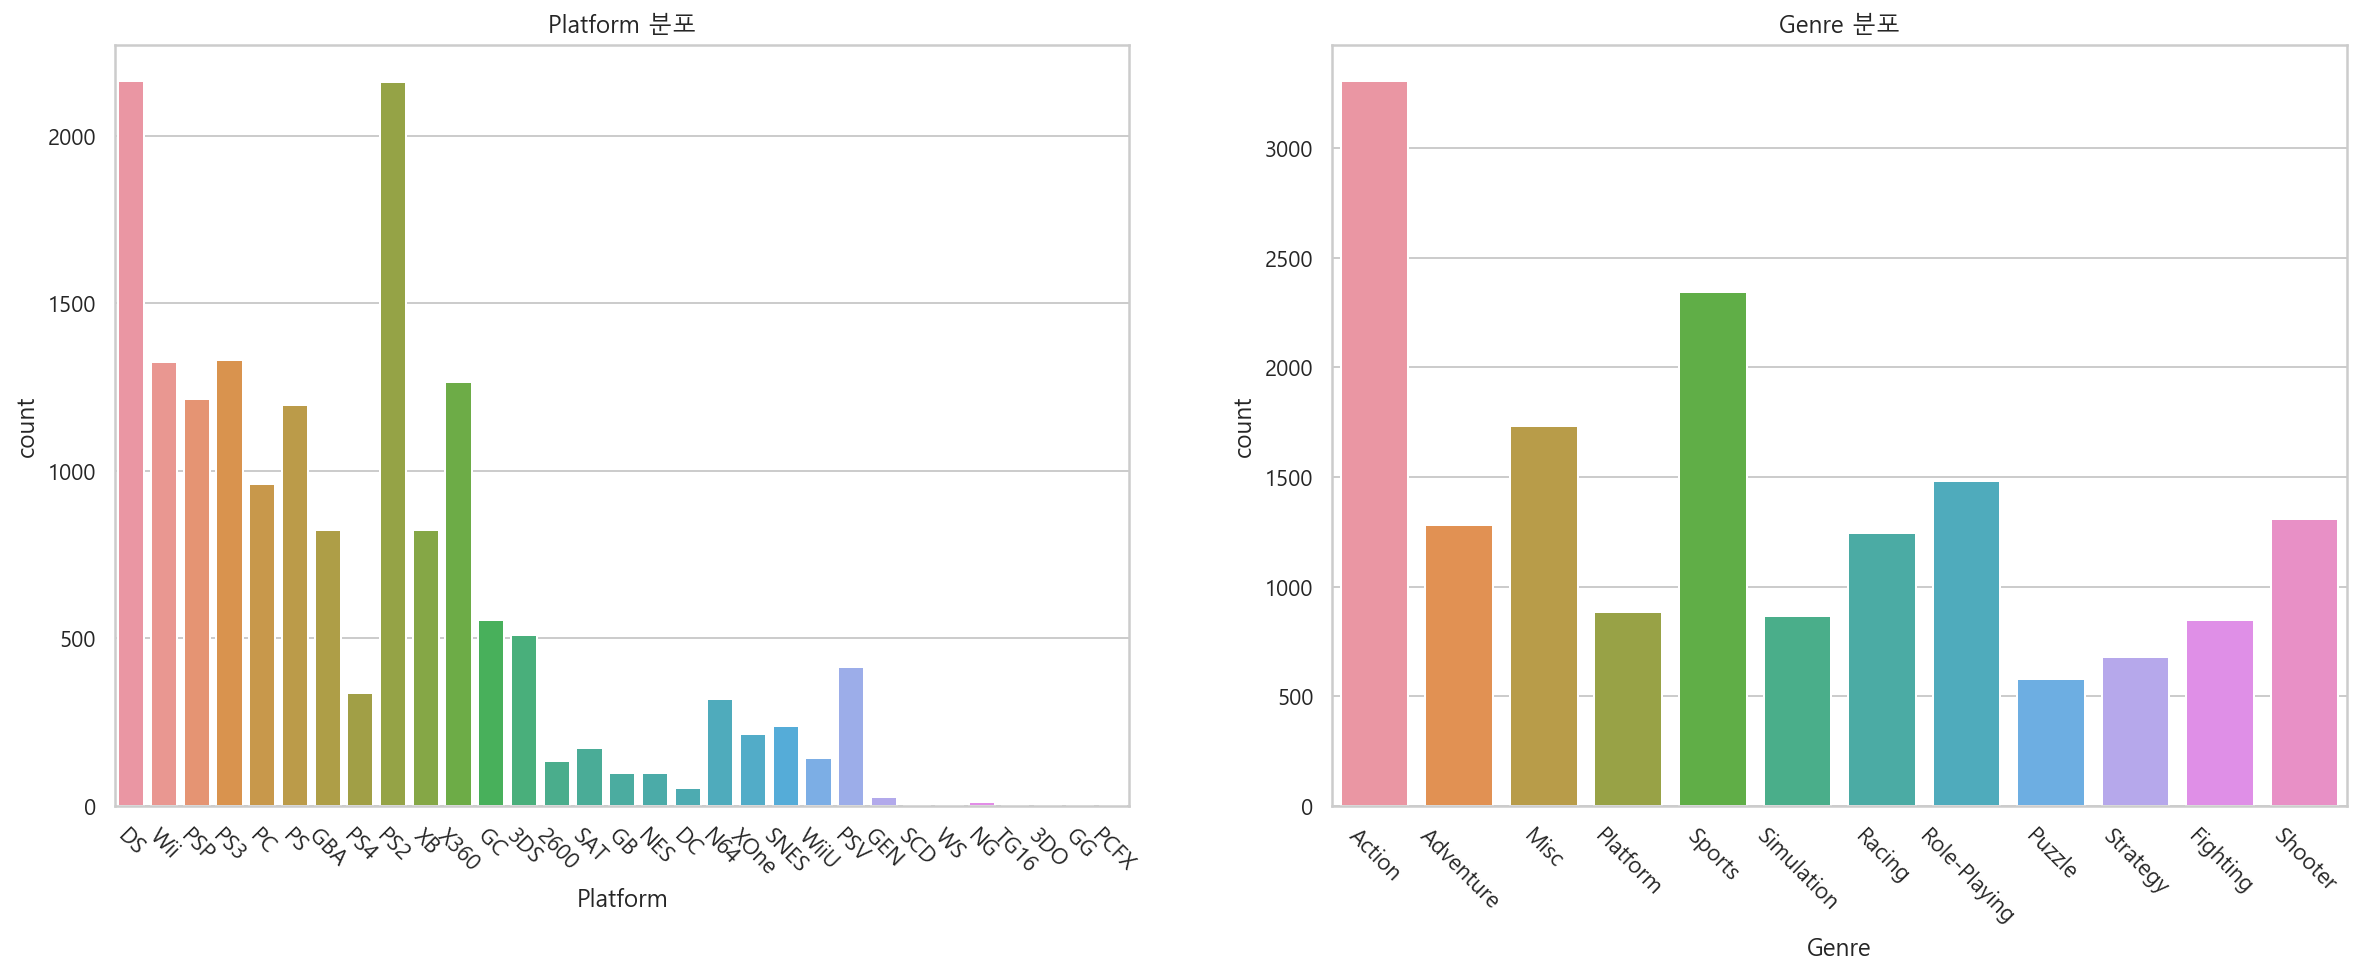

In [4]:
fig, ax = plt.subplots(1, 2, figsize = [20,7])

ax[0].set_title('Platform 분포')
ax[0].tick_params(axis='x', rotation=-45)
sns.countplot(df['Platform'], ax = ax[0]);

ax[1].set_title('Genre 분포')
ax[1].tick_params(axis='x', rotation=-45)
sns.countplot(df['Genre'], ax = ax[1]);

## 데이터셋의 변수들을 살펴보면서 발생한 문제점들
- 전처리가 필요한 부분들
    - 명목형으로 표현된 수치형 변수들 수정
    - 결측치와 이상치, 줄임표현이 있는 Feature 처리 후 int64처리
    - 장르와 제작사 Feture의 결측치 처리
    - 문자가 섞여있는 Sales데이터의 수치화, 이상치 제거

# 전처리

**1) 결측치 제거 - Year, Genre, Publisher**

In [5]:
# Feature별 결측치 수
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df['Genre'] = df['Genre'].fillna('Unknown') # Genre 결측값은 알려지지 않았다고 가정하고 Unknown으로 처리
df['Publisher'] = df['Publisher'].fillna('Unknown') # Publisher 결측값은 알려지지 않았다고 가정하고 Unknown으로 처리
df = df.dropna() # Year의 결측치는 제거함
print(df.shape)

(16327, 9)


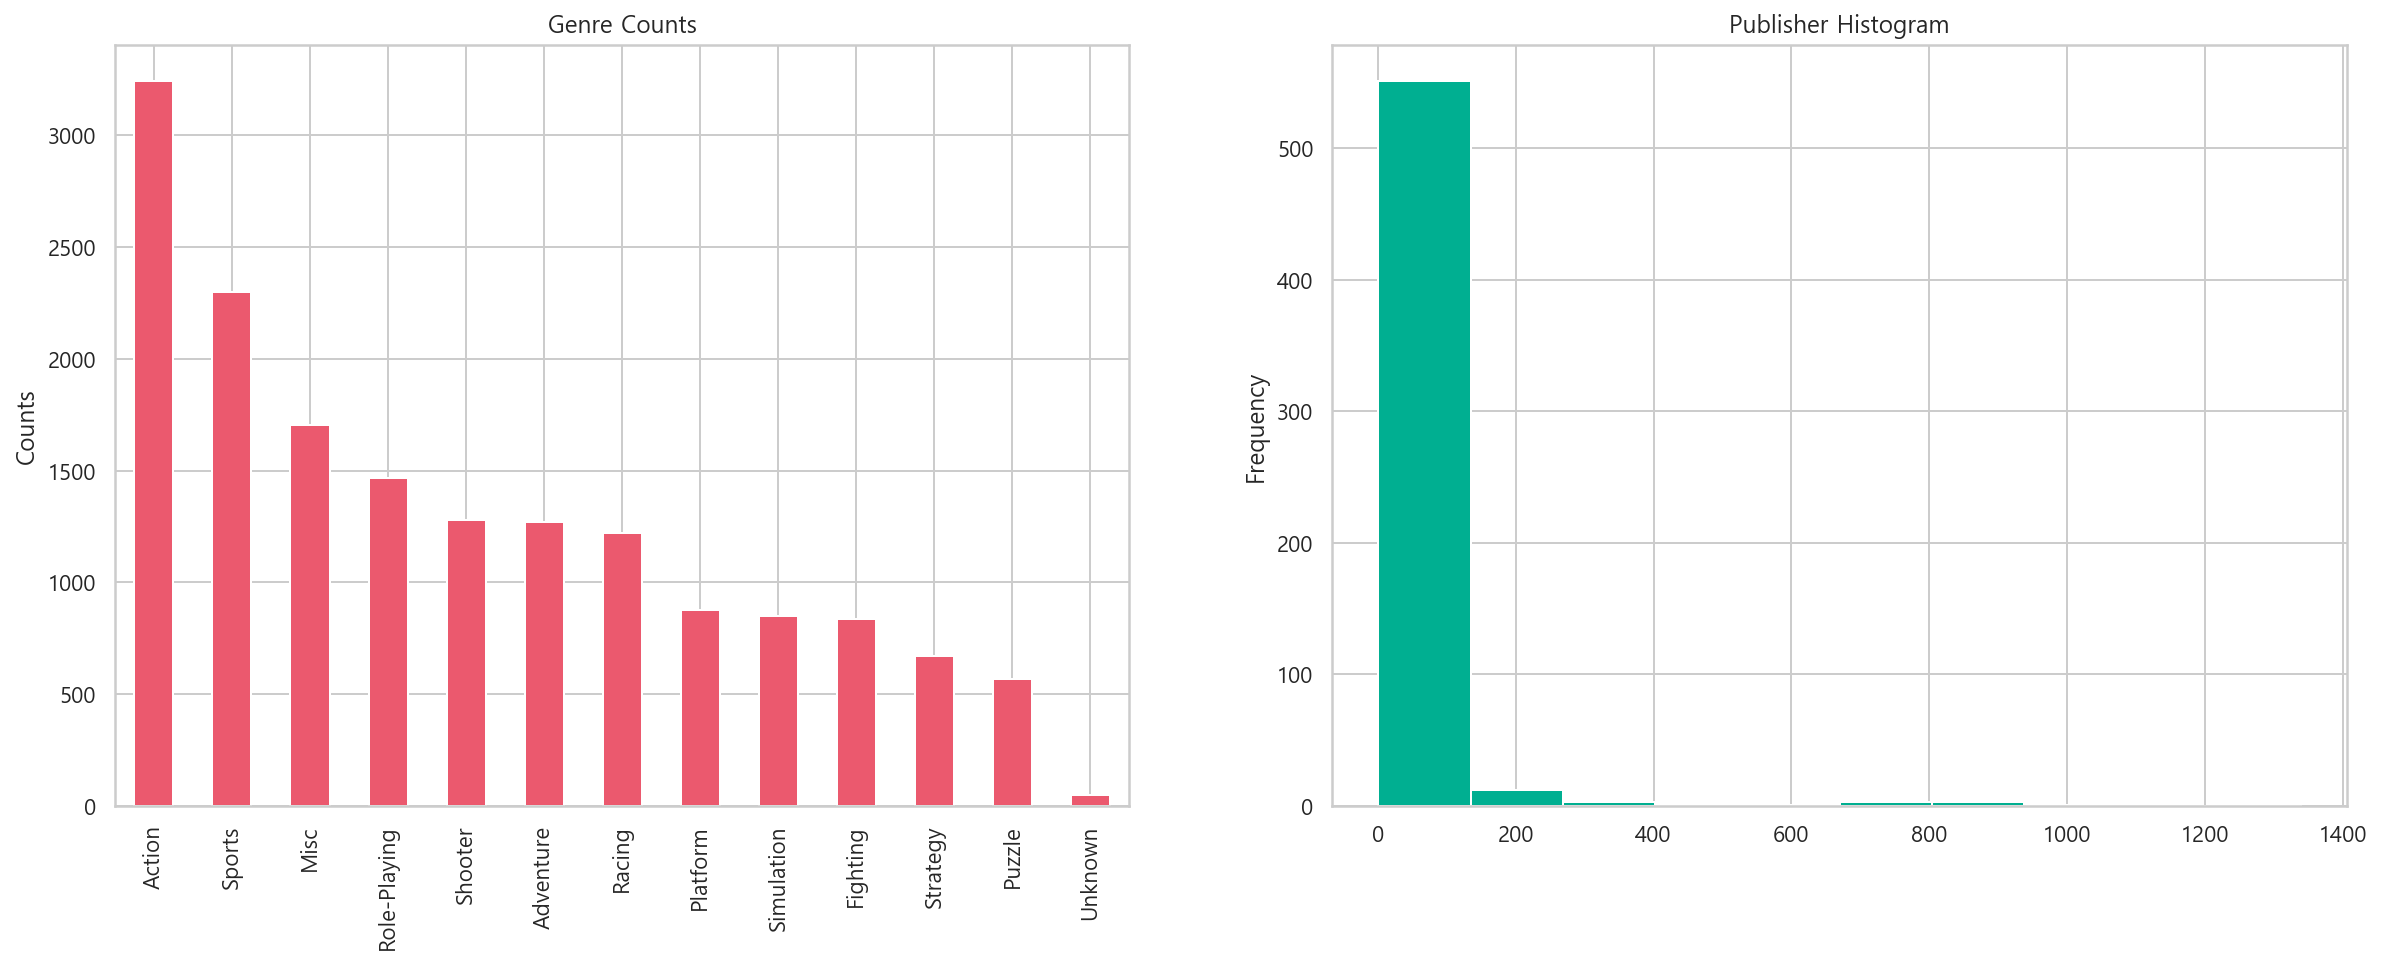

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7)) 

ax[0].set_title('Genre Counts')
ax[0].set_ylabel('Counts')
df['Genre'].value_counts().plot(kind = 'bar', ax = ax[0], color = '#eb596e');

ax[1].set_title('Publisher Histogram')
df['Publisher'].value_counts().plot(kind = 'hist', ax = ax[1], color = '#00af91');


In [8]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

**2) 줄임표현 수정 - Year**
- ex) 12 → 2012

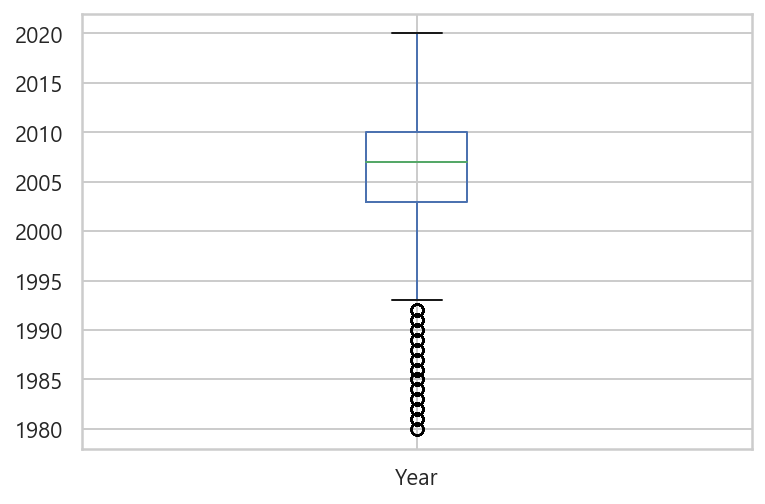

In [9]:
df['Year'] = df['Year'].astype('int')

for i in range(100+1):
    if 0 <=i < 10 :
        df['Year'] = df['Year'].replace(i, '200'+str(i))
    elif 10 <= i < 50:
        df['Year'] = df['Year'].replace(i, '20'+str(i))
    elif 50 <= i < 100:
        df['Year'] = df['Year'].replace(i, '19'+str(i))
        
df['Year'] = pd.to_numeric(df['Year'])
df['Year'].plot(kind = 'box')

**3) 문자형과 섞인 숫자형 Values 수정 후 Float 처리 - NA_Sales, EU_Sales, JP_Sales, Other_Sales**
- ex) 400K → 0.4, 0.24M → 0.24

In [10]:
Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in Sales:
    df[i] = (df[i].replace(r'[KM]+$', '', regex=True).astype(float) * df[i].str.extract(r'[\d\.]+([KM]+)', expand=False)
             .fillna(1)
             .replace(['K','M'], [10**-3, 10**0]).astype(float))
    
# 출처 : https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe

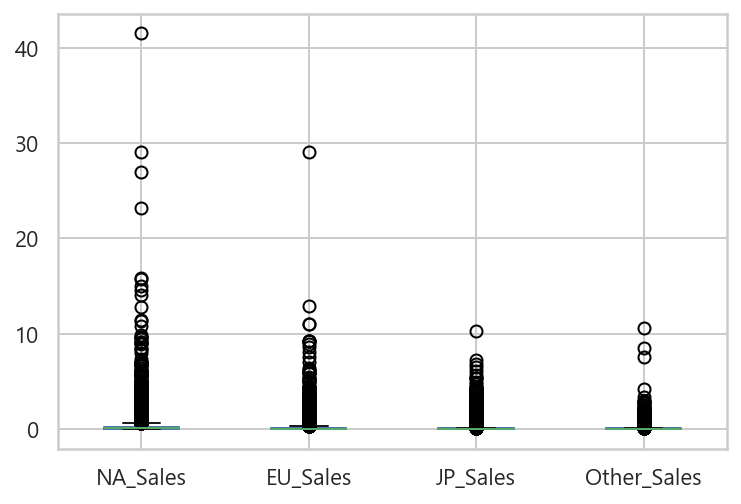

In [11]:
df[Sales].plot(kind = 'box');

In [12]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,2006.406443,0.265415,0.147554,0.078661,0.048325
std,5.828981,0.821591,0.508766,0.311557,0.189885
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


# Exploratory Data Analysis

**목표 : 다음 년도에는 어떤 게임을 설계해야 할까?**
- 국가별 판매금액의 차이가 있는가?
- 지역에 따라서 선호하는 게임 장르
- 지역에 따라서 선호하는 플랫폼
- 매출이 높은 제작사의 장르 선택 파악
- 매출이 높은 게임에 대한 분석 및 시각화 프로세스
- 군집분석

## 국가별 매출액간의 차이가 있는가 ?

In [13]:
from scipy import stats

# ANOVA 실행
f_result = stats.f_oneway(df['NA_Sales'], df['EU_Sales'], df['JP_Sales'], df['Other_Sales'])
        
#ANOVA의 f값 p값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

#ANOVA의 f값 p값 출력
print("One-way ANOVA")
print("F검정통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way ANOVA
F검정통계량 : 568.263
p-value : 0.0


- 귀무가설 : 네 지역별 매출액간의 차이가 없다.
- 대립가설 : 네 지역별 매출액간의 차이가 있다.

P.value 값이 0.0으로 유의수준 5%에서 통계적 결론은 귀무 가설 기각 <br>

통계적 결론 : 귀무가설기각 <br>
사실적 결론 : **네 지역별 매출액간의 차이가 있다.**

NA_Sales의 총 판매량 :  4333.43
NA_Sales의 평균 판매량 :  0.27
------------------------------------
EU_Sales의 총 판매량 :  2409.12
EU_Sales의 평균 판매량 :  0.15
------------------------------------
JP_Sales의 총 판매량 :  1284.3
JP_Sales의 평균 판매량 :  0.08
------------------------------------
Other_Sales의 총 판매량 :  789.01
Other_Sales의 평균 판매량 :  0.05
------------------------------------


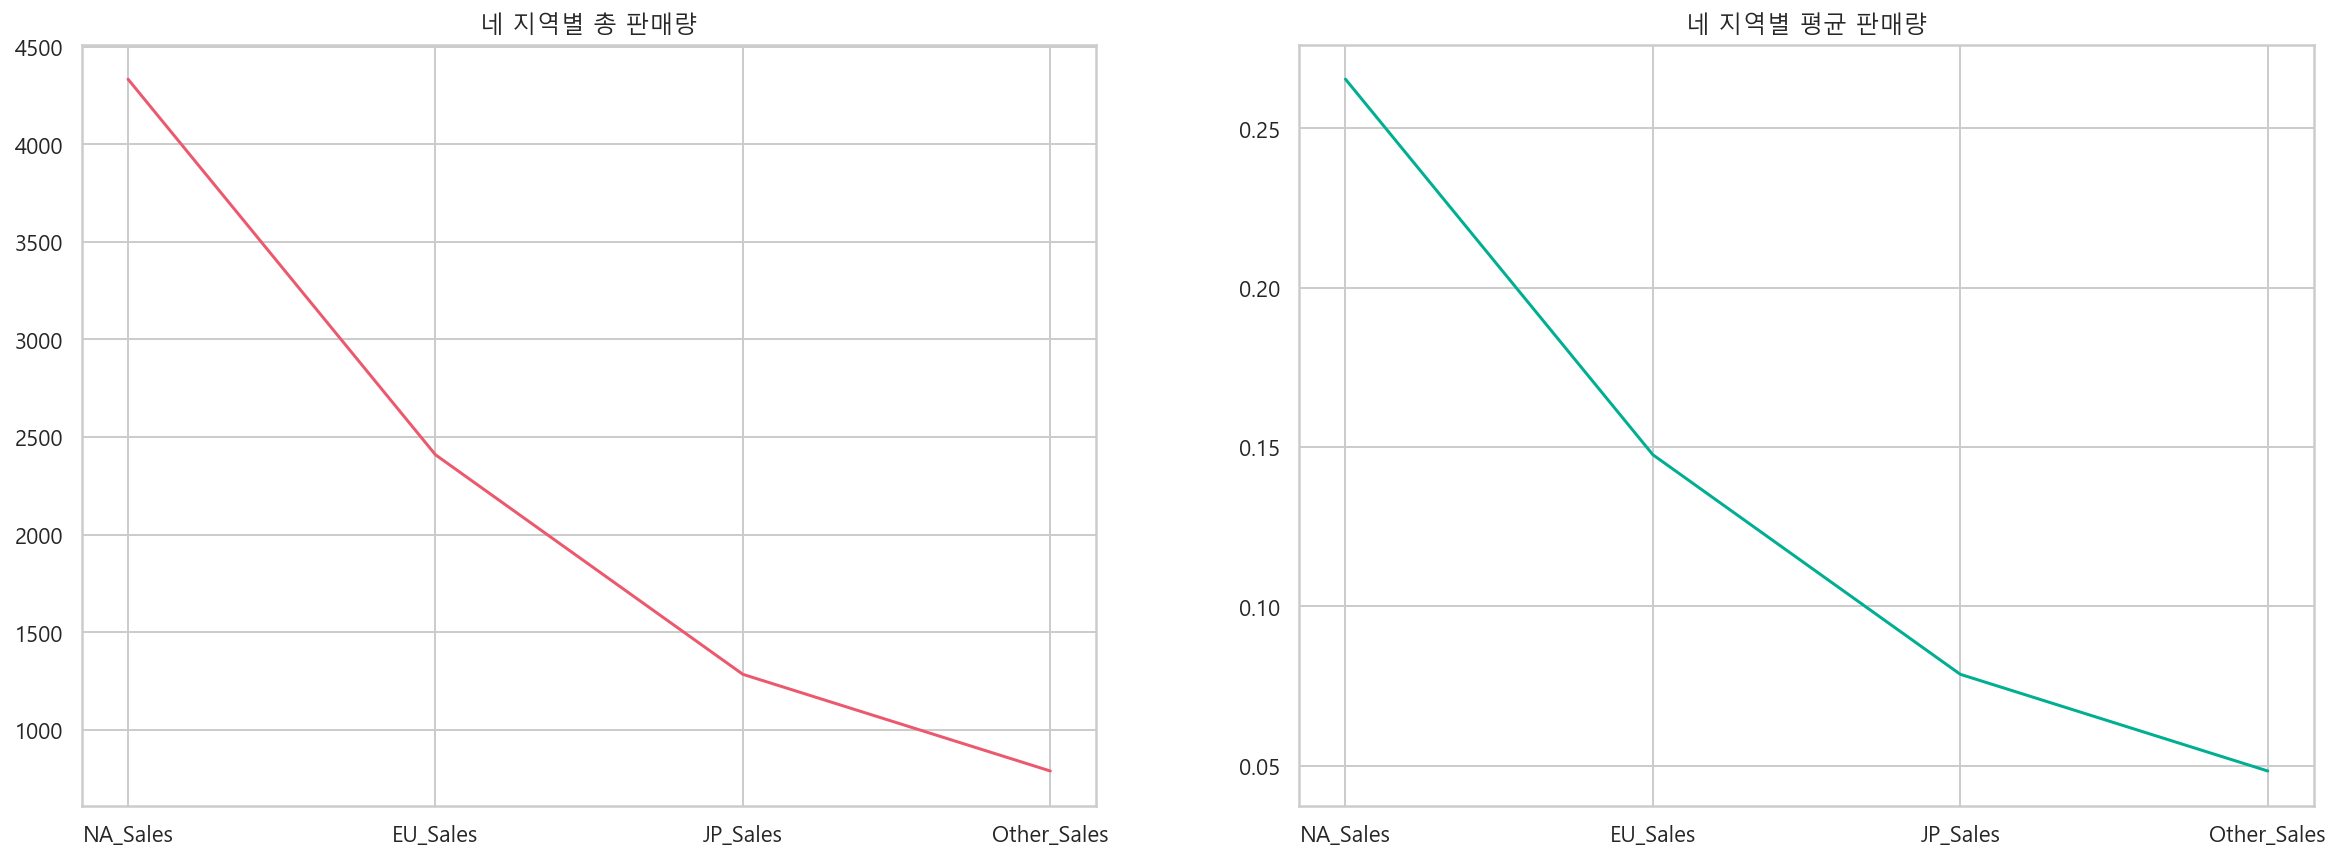

In [14]:
total_sales = []
mean_sales = []
for i in Sales:
    total_sales.append(df[i].sum())
    mean_sales.append(df[i].mean())
    print('{}의 총 매출액 : '.format(i),round(df[i].sum(),2))
    print('{}의 평균 매출액 : '.format(i),round(df[i].mean(),2))
    print('------------------------------------')

fig, ax = plt.subplots(1,2, figsize = (20,7))
ax[0].set_title('네 지역별 총 매출액')
ax[0].plot(Sales, total_sales, color = '#eb596e')
ax[1].set_title('네 지역별 평균 매출액')
ax[1].plot(Sales, mean_sales, color = '#00af91');



---
해석 : 
- 북미(NA) 시장이 가장 큰 것을 확인 할 수 있고 일본(JP)시장의 약 3~4배에 달한다.
- 유럽(EU) 시장 역시 일본(JP) 시장의 약 2배에 달하는 높은 매출액을 보인다.
- 일본(JP) 시장은 Other 시장의 총합보다 높은 값을 나타낸다.
<br><br>

- 지역별로 선호하는 게임에 따른 매출의 요인을 파악하자
---

## 지역에 따라서 선호하는 게임 장르가 다를까?

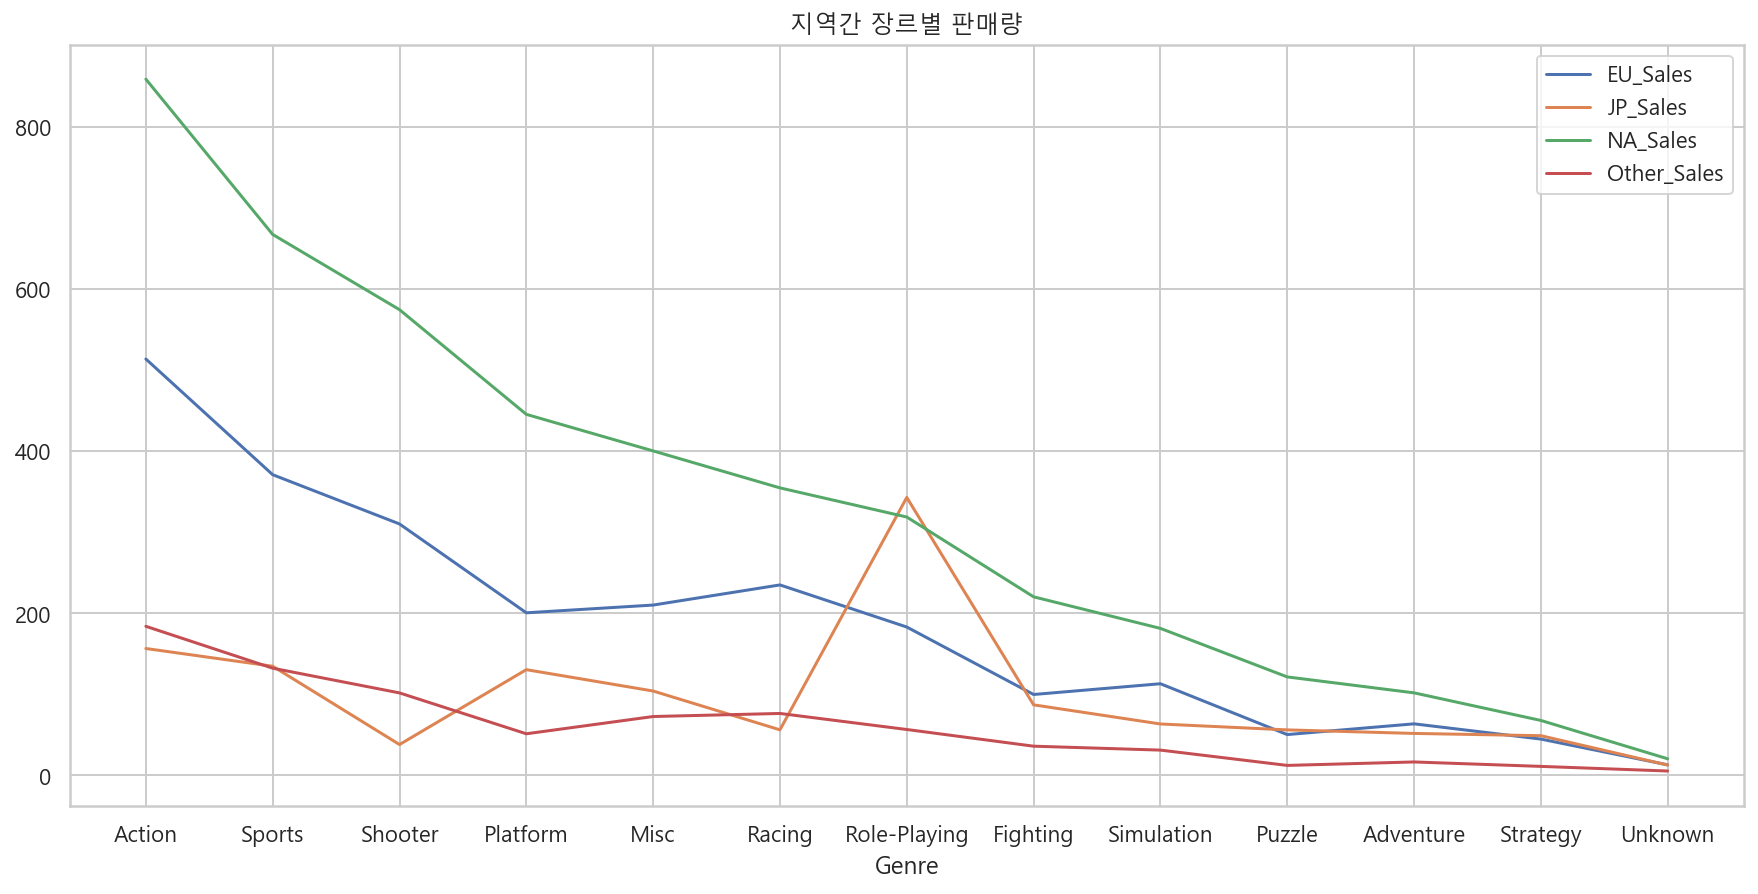

In [15]:
df.pivot_table(index = 'Genre', values = Sales, aggfunc = 'sum').sort_values(by = 'NA_Sales',ascending =False).plot(figsize = [15,7]);
plt.title('지역간 장르별 매출액')
plt.xticks(np.arange(13),df.pivot_table(index = 'Genre', values = Sales, aggfunc = 'sum').sort_values(by = 'NA_Sales',ascending =False).index);

---
해석 : 
- 대부분 지역은 Action, Sports, Shooter, Platform ..의 순서로 비슷한 분포를 가진다.
- Action, Sports, Shooter 장르가 압도적으로 높은 매출액을 보인다.
- 하지만, 일본의 경우 Role-Playing에서 굉장히 높은 비중을 갖으며 일본시장을 공략할 때에는 보통의 지역과 다른 접근이 필요할 것으로 보인다. 
- 또한, Shooter에서 굉장히 낮은 매출액을 보이므로 일본시장 공략을 피해야 할 것으로 생각됨
---


## 매출액이 높은 3가지 장르의 제작사 파악 (+ Role-Playing)

In [16]:
#NA, EU, Other
neo = df.drop(columns = 'JP_Sales')
action = neo.loc[neo['Genre'] == 'Action']
sports = neo.loc[neo['Genre'] == 'Sports']
shooter = neo.loc[neo['Genre'] == 'Shooter']

#JP
jp = df.drop(columns = ['NA_Sales','EU_Sales','Other_Sales'])
roleplay = jp.loc[jp['Genre'] == 'Role-Playing']

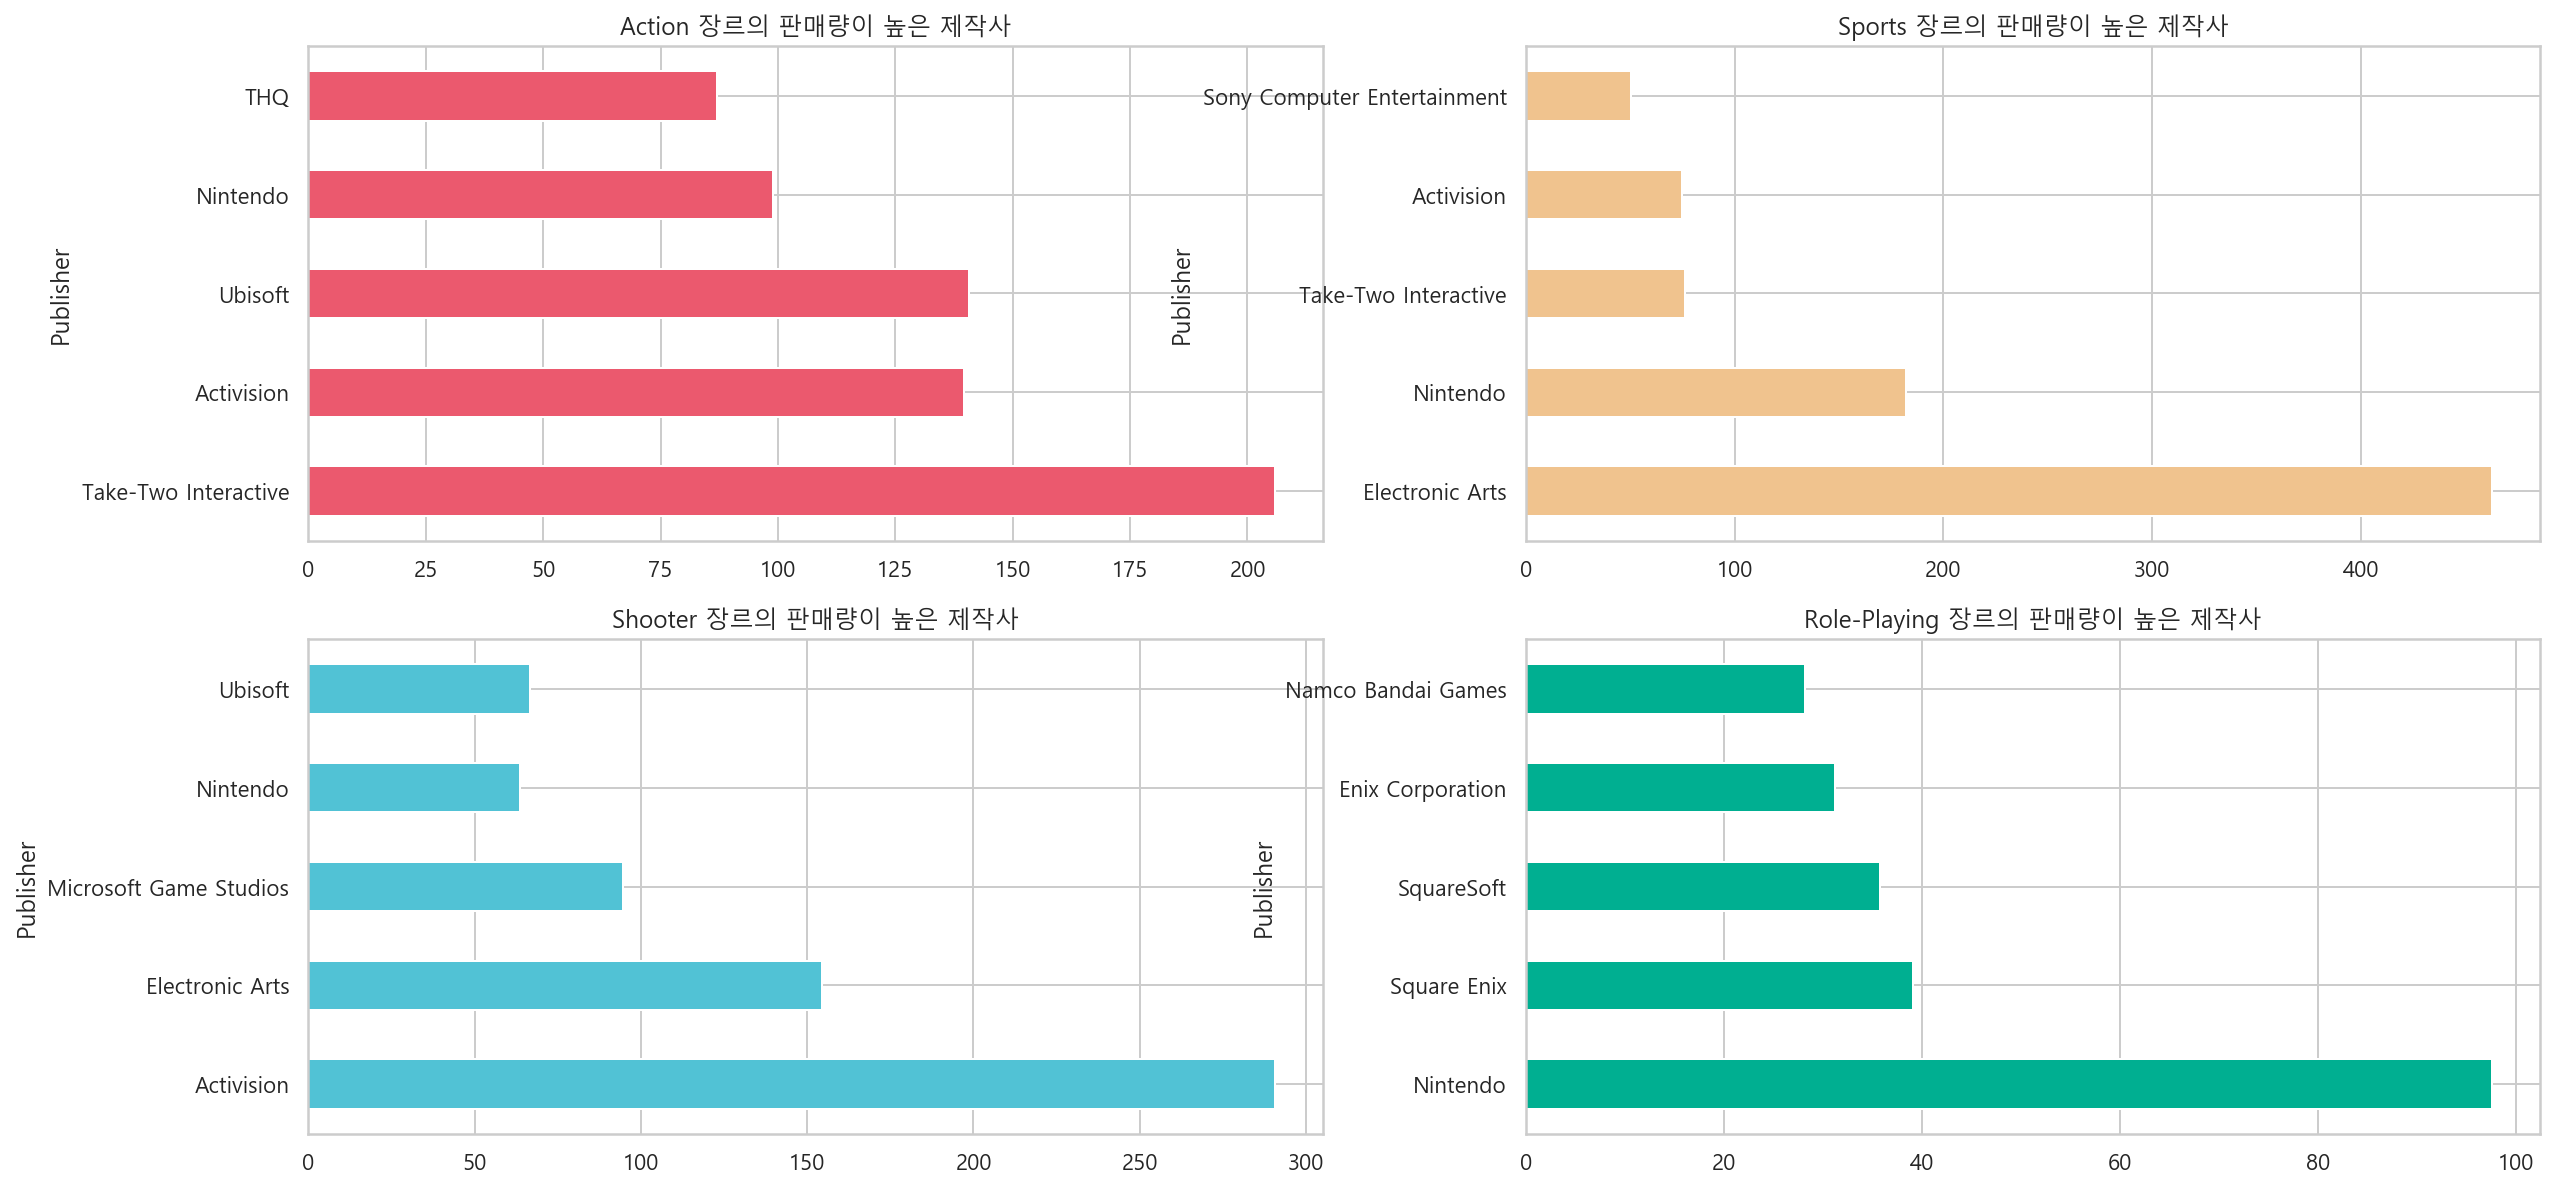

In [18]:
fig, ax = plt.subplots(2, 2, figsize = [20,10])
ax[0][0].set_title('Action 장르의 매출액이 높은 제작사')
action.pivot_table(index = 'Publisher', values = ['NA_Sales', 'EU_Sales', 'Other_Sales'], aggfunc = 'sum').sort_values(by = 'NA_Sales', ascending =False).T.sum().head(5).plot(kind ='barh', color = '#eb596e', ax = ax[0][0]);

ax[0][1].set_title('Sports 장르의 매출액이 높은 제작사')
sports.pivot_table(index = 'Publisher', values = ['NA_Sales', 'EU_Sales', 'Other_Sales'], aggfunc = 'sum').sort_values(by = 'NA_Sales', ascending =False).T.sum().head(5).plot(kind ='barh', color = '#f0c38e', ax = ax[0][1]);

ax[1][0].set_title('Shooter 장르의 매출액이 높은 제작사')
shooter.pivot_table(index = 'Publisher', values = ['NA_Sales', 'EU_Sales', 'Other_Sales'], aggfunc = 'sum').sort_values(by = 'NA_Sales', ascending =False).T.sum().head(5).plot(kind ='barh', color = '#51c2d5', ax = ax[1][0]);

ax[1][1].set_title('Role-Playing 장르의 매출액이 높은 제작사')
roleplay.pivot_table(index = 'Publisher', values = 'JP_Sales', aggfunc = 'sum').sort_values(by = 'JP_Sales', ascending =False).T.sum().head(5).plot(kind ='barh', color = '#00af91', ax = ax[1][1]);


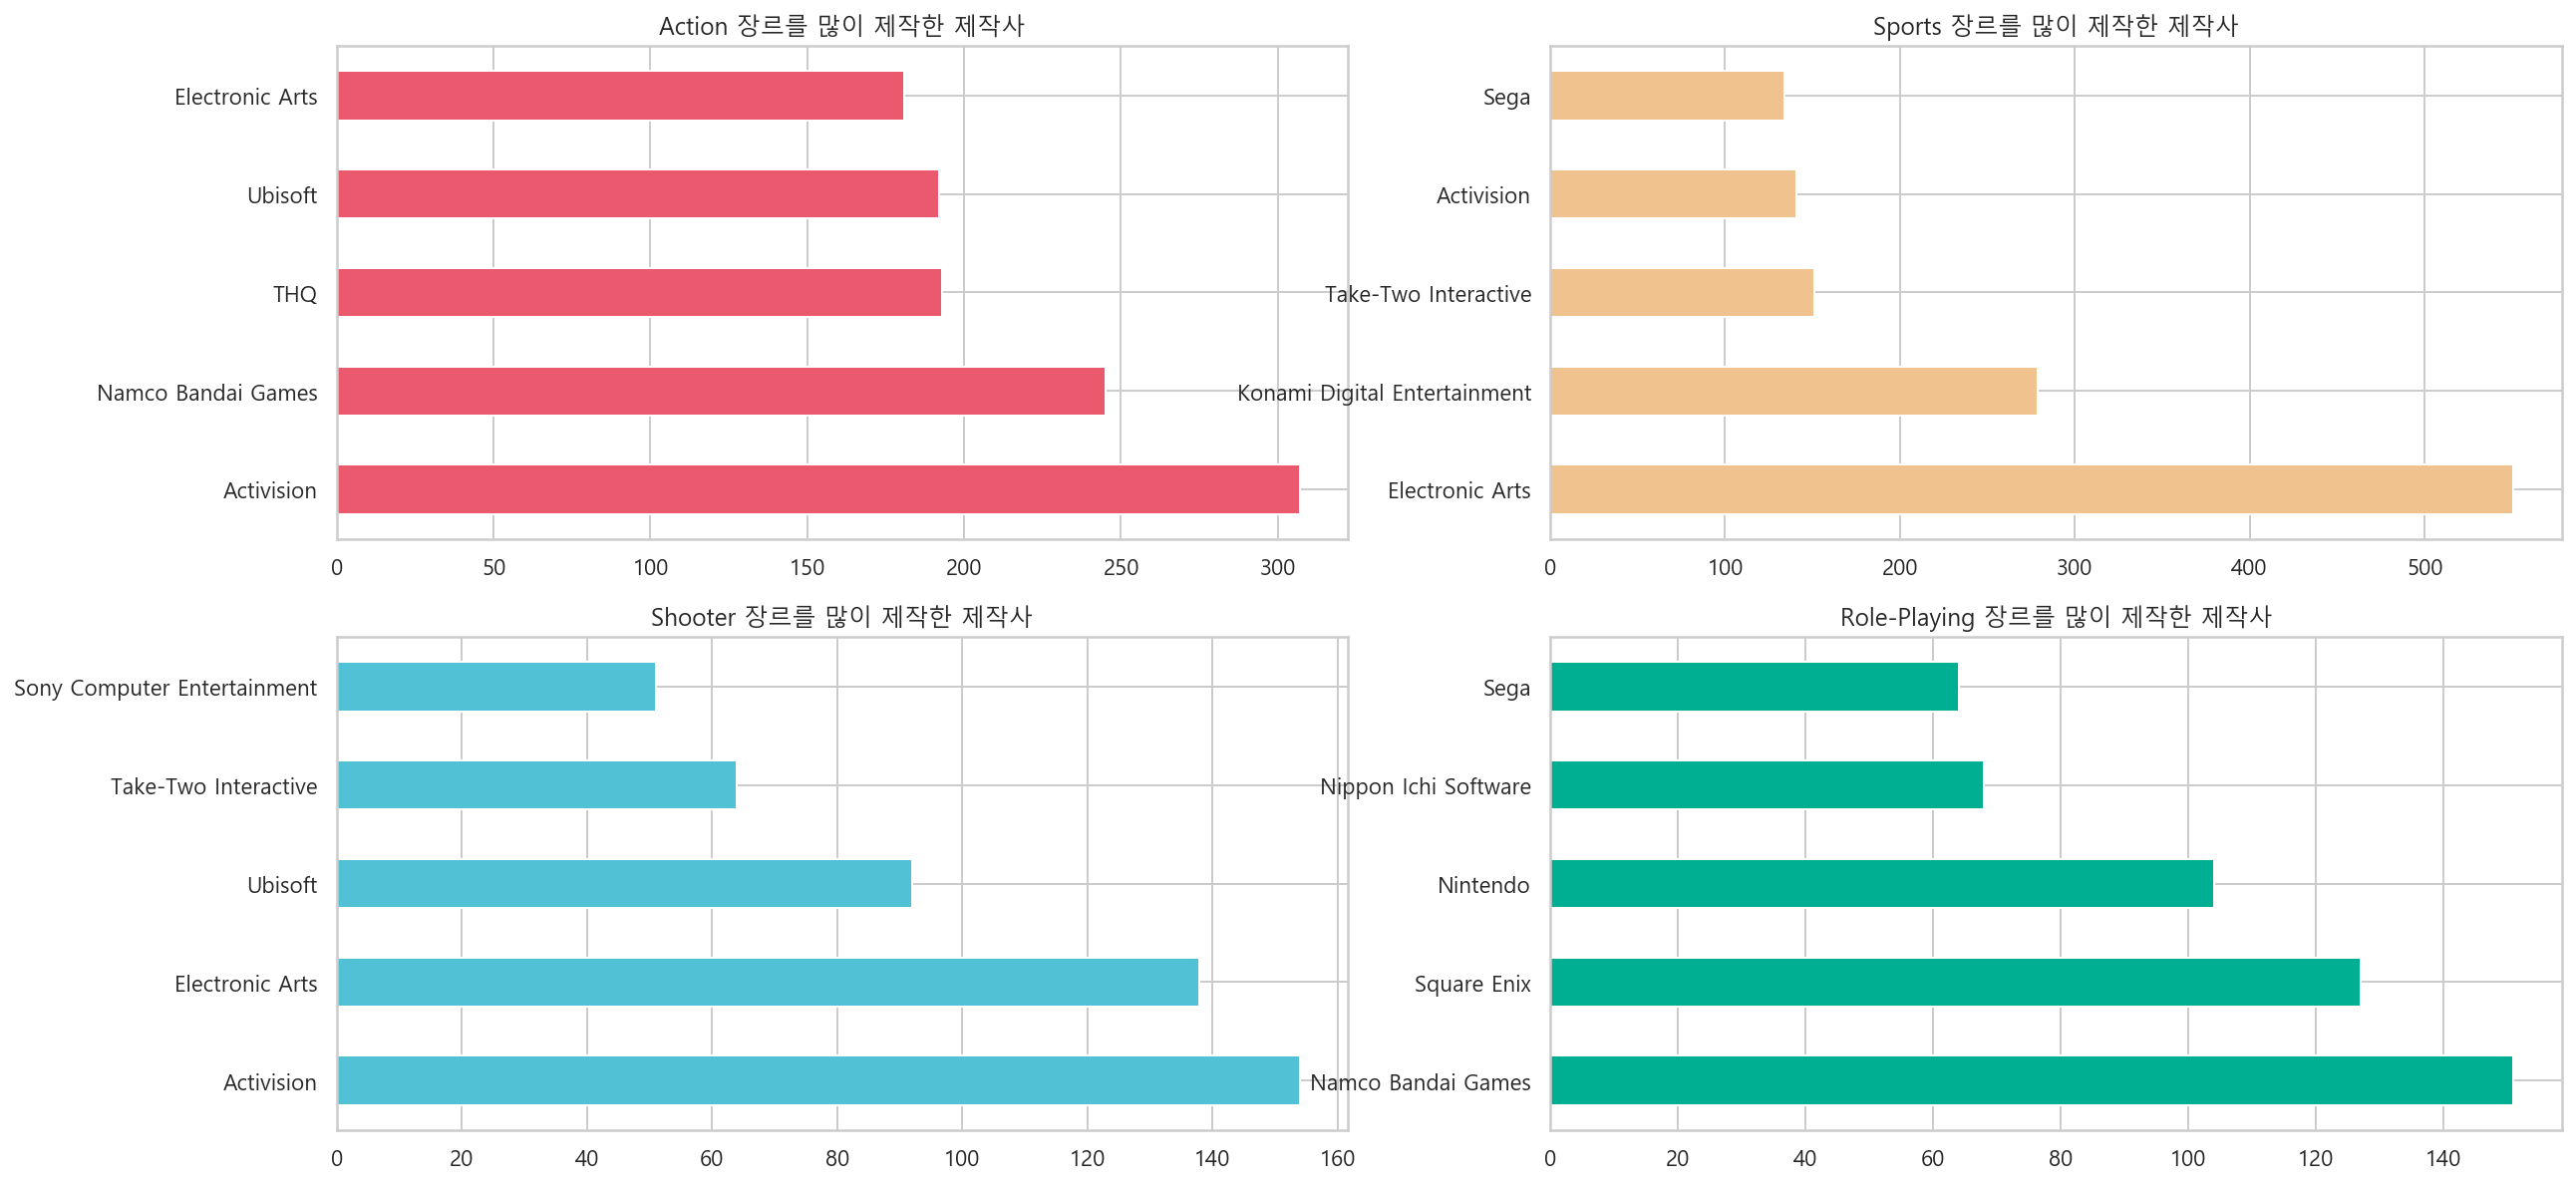

In [19]:
fig, ax = plt.subplots(2, 2, figsize = [20,10])
ax[0][0].set_title('Action 장르를 많이 제작한 제작사')
action['Publisher'].value_counts().head(5).plot(kind ='barh', color = '#eb596e', ax = ax[0][0]);
ax[0][1].set_title('Sports 장르를 많이 제작한 제작사')
sports['Publisher'].value_counts().head(5).plot(kind ='barh', color = '#f0c38e', ax = ax[0][1]);
ax[1][0].set_title('Shooter 장르를 많이 제작한 제작사')
shooter['Publisher'].value_counts().head(5).plot(kind ='barh', color = '#51c2d5', ax = ax[1][0]);
ax[1][1].set_title('Role-Playing 장르를 많이 제작한 제작사')
roleplay['Publisher'].value_counts().head(5).plot(kind ='barh', color = '#00af91', ax = ax[1][1]);

* **장르별 매출액이 높은 제작사** <br>

Action 장르의 매출액이 높은 제작사 :
 ['Take-Two Interactive', '**Activision**', 'Ubisoft']

Sports 장르의 매출액이 높은 제작사 :
 ['**Electronic Arts**', 'Nintendo', '**Take-Two Interactive**']

Shooter 장르의 매출액이 높은 제작사 :
 ['**Activision**', '**Electronic Arts**', 'Microsoft Game Studios']

Role-Playing 장르의 매출액이 높은 제작사 :
 ['**Nintendo**', '**Square Enix**', 'SquareSoft']

---

* **해당 장르를 많이 제작한 제작사** <br>

Action 장르를 많이 제작한 제작사 : 
 ['**Activision**', '**Namco Bandai Games**', 'THQ']

Sports 장르를 많이 제작한 제작사 : 
 ['**Electronic Arts**', 'Konami Digital Entertainment', '**Take-Two Interactive**']

Shooter 장르를 많이 제작한 제작사 : 
 ['**Activision**', '**Electronic Arts**', 'Ubisoft']

Role-Playing 장르를 많이 제작한 제작사(in Japan) : 
 ['**Namco Bandai Games**', '**Square Enix**', '**Nintendo**']
 
 ---
 해석 :
 - 보통 제작을 많이 한 제작사가 많은 매출액을 갖고 있다.
 - 하지만, 반드시 많이 제작했다고 매출액이 더 높은 것은 아니다. (정비례하지는 않다.)
 - 다음년도에 게임의 장르를 정하고 제작사를 정할 때 도움이 될 것이다.

## 연도에 따른 장르별 매출액 - 최근 트렌드 파악

2014년 이후를 기준으로 트렌드 파악

**1) NA지역**

In [20]:
df.pivot_table(index ='Year', columns = 'Genre', values = "NA_Sales", aggfunc='sum', margins=True, fill_value=0)[30:]

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown,All
Year,,,,,,,,,,,,,,
2010,60.32,6.30,7.46,53.18,17.16,6.55,14.26,28.55,43.10,11.23,48.15,5.78,2.20,304.24
2011,53.73,5.89,11.49,32.07,13.06,1.68,14.61,19.78,49.82,7.49,27.45,3.36,0.63,241.06
2012,52.16,1.78,4.34,10.99,7.32,0.30,4.38,17.85,35.06,3.09,16.40,0.94,0.35,154.96
2013,53.79,1.63,3.18,12.53,11.62,0.19,4.21,7.92,30.70,2.26,19.18,2.39,5.17,154.77
2014,38.73,1.94,6.89,9.43,3.02,0.62,5.86,13.56,30.72,1.22,19.82,0.16,0.00,131.97
2015,21.83,2.76,3.60,4.81,2.50,0.05,1.97,13.35,30.79,1.13,18.46,0.57,1.00,102.82
2016,5.87,0.34,1.60,0.22,0.79,0.00,0.33,1.39,7.44,0.00,4.57,0.11,0.00,22.66
2017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.27


- **인기있는 장르의 연도별 매출액**

|Year|Action|Shooter|Sports|
|:--|--:|--:|--:|
|2014|38.73|30.72|19.82|
|2015|21.83|30.79|18.46|
|2016|5.87|7.44|4.57|

- **Trend 파악을 위한 scale 조절**<br>
$action\over((action+shooter+sports)/3$

|Year|Action|Shooter|Sports|
|:--|--:|--:|--:|
|2014|1.30|1.03|0.67|
|2015|0.92|1.3|0.78|
|2016|0.98|1.25|0.77|

<br><br>
- 앞서 보았던 판매량 데이터만 볼 경우 Action을 해야할 것 같지만 최근 트렌드에 따르면 NA지역에는 **Shooter** 장르가 가장 인기있는 것을 확인 할 수 있다.

**2) EU 지역**

In [21]:
df.pivot_table(index ='Year', columns = 'Genre', values = "EU_Sales", aggfunc='sum', margins=True, fill_value=0)[30:]

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown,All
Year,,,,,,,,,,,,,,
2010,35.75,5.24,4.22,23.58,8.55,3.20,14.52,13.70,23.90,6.95,29.03,4.51,3.58,176.73
2011,41.04,4.69,5.57,14.04,8.86,2.19,13.52,14.10,35.31,5.21,19.86,2.91,0.14,167.44
2012,42.26,1.31,2.43,6.63,5.88,0.42,7.58,11.97,26.34,3.62,8.83,0.99,0.52,118.78
2013,45.21,1.97,1.95,7.50,9.09,0.48,6.32,4.89,23.15,3.56,15.16,2.47,4.05,125.80
2014,40.48,2.11,3.07,8.87,3.63,0.38,7.70,11.24,25.81,3.44,18.70,0.22,0.00,125.65
2015,23.89,3.36,2.38,3.71,1.81,0.11,4.74,12.52,24.23,2.51,16.69,0.98,0.78,97.71
2016,6.36,0.39,1.15,0.09,0.87,0.00,1.14,1.29,7.70,0.09,7.36,0.32,0.00,26.76
2017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- **인기있는 장르의 연도별 매출액**

|Year|Action|Shooter|Sports|
|:--|--:|--:|--:|
|2014|40.48|25.81|18.70|
|2015|23.89|24.23|16.69|
|2016|6.36|7.70|7.36|

- **Trend 파악을 위한 scale 조절**<br>
ex) $action\over((action+shooter+sports)/3$

|Year|Action|Shooter|Sports|
|:--|--:|--:|--:|
|2014|1.43|0.91|1.22|
|2015|1.11|1.12|0.77|
|2016|0.89|1.08|1.03|

<br><br>
- NA지역과 같이 판매량만 따지면 Action이겠지만 최근 **Shooter** 장르가 가장 인기있는 트렌드이고 Sports 장르도 좋은 선택이 될 수 있다.

**3) Other 지역**

In [22]:
df.pivot_table(index ='Year', columns = 'Genre', values = "Other_Sales", aggfunc='sum', margins=True, fill_value=0)[30:]


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown,All
Year,,,,,,,,,,,,,,
2010,12.85,1.45,1.68,7.44,2.59,0.91,5.11,4.64,8.32,2.22,10.42,1.51,0.76,59.90
2011,13.41,1.52,2.12,4.92,2.71,0.46,3.72,5.01,11.53,1.40,6.67,0.86,0.06,54.39
2012,14.14,0.44,0.97,1.65,1.52,0.06,2.27,3.56,8.82,0.80,3.08,0.29,0.22,37.82
2013,15.33,0.79,0.82,2.05,2.30,0.08,1.95,2.21,7.15,0.66,5.05,0.64,0.79,39.82
2014,13.30,0.68,1.39,3.07,0.96,0.10,1.69,3.38,8.38,0.51,6.52,0.04,0.00,40.02
2015,6.97,0.85,1.01,1.04,0.45,0.01,0.93,3.85,8.41,0.39,5.62,0.12,0.36,30.01
2016,1.83,0.11,0.46,0.03,0.31,0.00,0.19,0.44,2.42,0.00,1.92,0.04,0.00,7.75
2017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02


- **인기있는 장르의 연도별 매출액**

|Year|Action|Shooter|Sports|
|:--|--:|--:|--:|
|2014|13.30|8.38|6.52|
|2015|6.97|8.41|5.62|
|2016|1.83|2.42	|1.92|

- **Trend 파악을 위한 scale 조절**<br>
ex) $action\over((action+shooter+sports)/3$

|Year|Action|Shooter|Sports|
|:--|--:|--:|--:|
|2014|1.41|0.89|0.69|
|2015|1.00|1.20|0.80|
|2016|0.89|1.18|0.93|

* Other지역 역시 **Shooter** 장르가 가장 트렌드하다.

**4) JP 지역**

In [23]:
jp.pivot_table(index ='Year', columns = 'Genre', values = "JP_Sales", aggfunc='sum', margins=True, fill_value=0)[30:]

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown,All
Year,,,,,,,,,,,,,,
2010,8.58,3.58,1.52,4.20,3.68,0.49,1.04,23.67,2.12,1.66,4.42,2.02,2.51,59.49
2011,10.82,3.78,2.93,4.74,3.49,0.77,3.12,14.43,2.69,1.23,3.08,1.90,0.06,53.04
2012,12.25,2.37,1.79,3.66,3.84,0.96,0.20,14.39,2.62,5.86,2.59,1.11,0.10,51.74
2013,10.88,2.22,1.28,3.58,2.08,0.25,0.54,15.52,1.73,2.20,2.15,0.82,4.34,47.59
2014,6.50,1.36,4.80,2.36,1.26,0.41,1.46,17.71,1.08,0.37,1.60,0.55,0.00,39.46
2015,15.56,1.04,0.79,2.10,1.29,0.52,0.28,6.71,2.69,1.58,0.72,0.15,0.29,33.72
2016,5.79,0.97,0.64,0.81,0.11,0.00,0.01,3.63,0.61,0.30,0.78,0.05,0.00,13.70
2017,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.05
2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- **인기있는 장르의 연도별 매출액**

|Year|Action|Role-Playing|Sports|
|:--|--:|--:|--:|
|2013|10.88|15.52|2.15|
|2014|6.50|17.71|1.60|
|2015|15.56|6.71|0.72|
|2016|5.79|3.63|0.78|

- **Trend 파악을 위한 scale 조절**<br>
ex) $action\over((action+shooter+sports)/3$

|Year|Action|Role-Playing|Sports|
|:--|--:|--:|--:|
|2013|1.14|1.63|0.23|
|2014|0.76|2.06|0.19|
|2015|2.03|0.88|0.09|
|2016|1.70|1.07|0.23|

* JP지역은 Role-Playing 장르가 압도적일 줄 알았지만 최근에는 **Action** 장르가 가장 트렌드한 것을 확인할 수 있다.
* 그럼에도 **Role-Playing**은 steady한 실적을 내고 있으므로 안전한 시장을 바란다면 괜찮은 선택일 수 있다.

---
해석 : 

- NA/EU/Other 지역같은 경우 최근 Shooter 장르가 대세를 이루고 있으므로 내년 시장에 **Shooter** 장르를 목표하면 될 것이다.
- JP지역 같은 경우 Role-Playing을 예상했지만 지역간 장르별 매출액과 달리 최근 **Action** 장르의 인기가 높아진 것을 확인할 수 있었다. 
- 지역에 맞춰 시장 특성에 맞는 전략을 세우자
---

## 매출이 높은 게임에 대한 분석

**1) 전체 기간에 대한 지역별 매출액이 많은 게임 분포 확인**

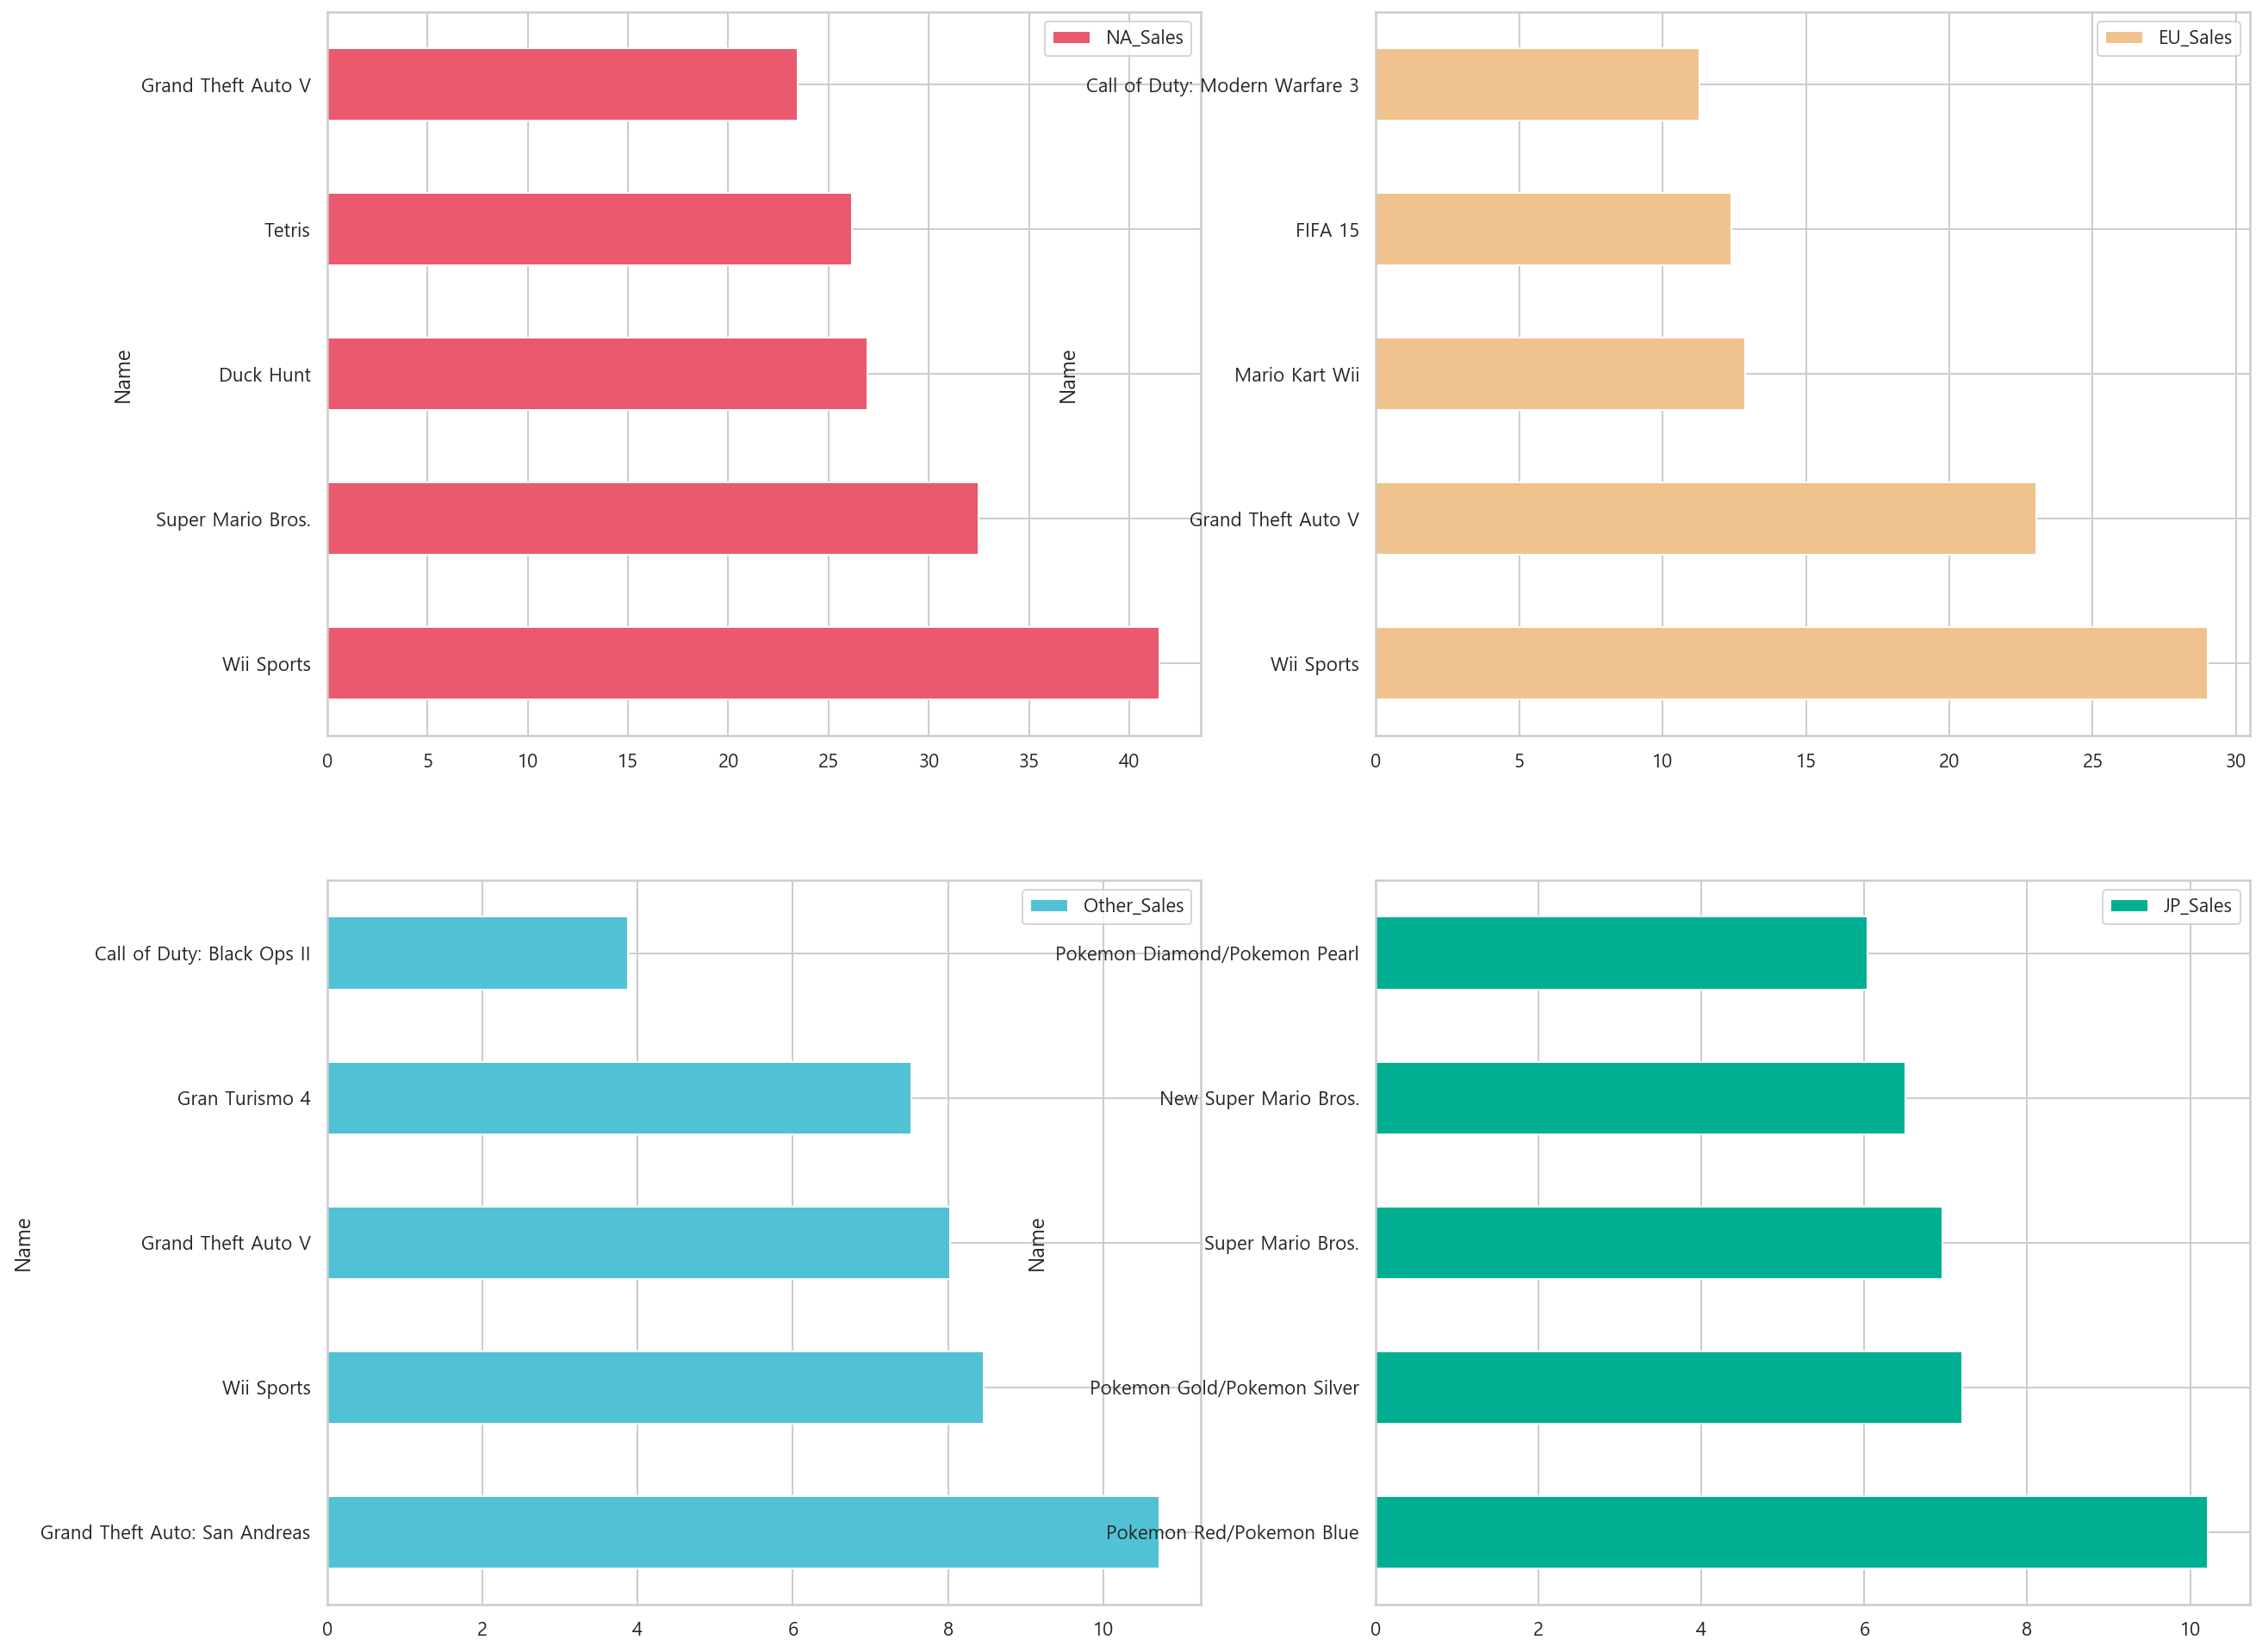

In [112]:
fig, ax = plt.subplots(2,2, figsize= [20,17])
df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'NA_Sales', ascending =False)[['NA_Sales']].head(5).plot(kind = 'barh', ax = ax[0][0], color = '#eb596e');
df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'EU_Sales', ascending =False)[['EU_Sales']].head(5).plot(kind = 'barh', ax = ax[0][1], color = '#f0c38e');
df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'Other_Sales', ascending =False)[['Other_Sales']].head(5).plot(kind = 'barh', ax = ax[1][0], color = '#51c2d5');
df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'JP_Sales', ascending =False)[['JP_Sales']].head(5).plot(kind = 'barh', ax = ax[1][1], color = '#00af91');

역대 NA_Sales의 매출액이 높은 게임 : <br>['**Wii Sports**', '**Super Mario Bros.**', 'Duck Hunt', 'Tetris', '**Grand Theft Auto V**']

역대 EU_Sales의 매출액이 높은 게임 : <br>['**Wii Sports**', '**Grand Theft Auto V**', 'Mario Kart Wii', 'FIFA 15', 'Call of Duty: Modern Warfare 3']

역대 Other_Sales의 매출액이 높은 게임 : <br>['Grand Theft Auto: San Andreas', '**Wii Sports**', '**Grand Theft Auto V**', 'Gran Turismo 4', 'Call of Duty: Black Ops II']

역대 JP_Sales의 매출액이 높은 게임 : <br>['Pokemon Red/Pokemon Blue', 'Pokemon Gold/Pokemon Silver', '**Super Mario Bros.**', 'New Super Mario Bros.', 'Pokemon Diamond/Pokemon Pearl']

---
해석 : 
- Wii Sports가 세계적으로 역대급 판매량을 선보일 때 일본에서는 가장 저조한 성적을 걷었다. → 자국 회사임에도 불구하고 몸을 움직이는 것을 안 좋아한다는 생각을 해볼 수 있다.
- 또한, 일본에서 포켓몬 게임은 굉장히 꾸준히 안정적인 높은 수익을 낼 수 있는 분야이다.
- 세계적으로(일본 제외) GTA게임이 압도적인 흥행을 보인 것을 확인할 수있고 전체기간동안 게임의 장르와 트렌드가 바뀌었다는 것을 확인 할 수 있다.
- 최근에 데이터로 다시 확인해보자
---

**2) 2010년 이후의 지역별 매출액이 많은 게임**

**2-1) 네 지역별 매출액이 많은 게임**

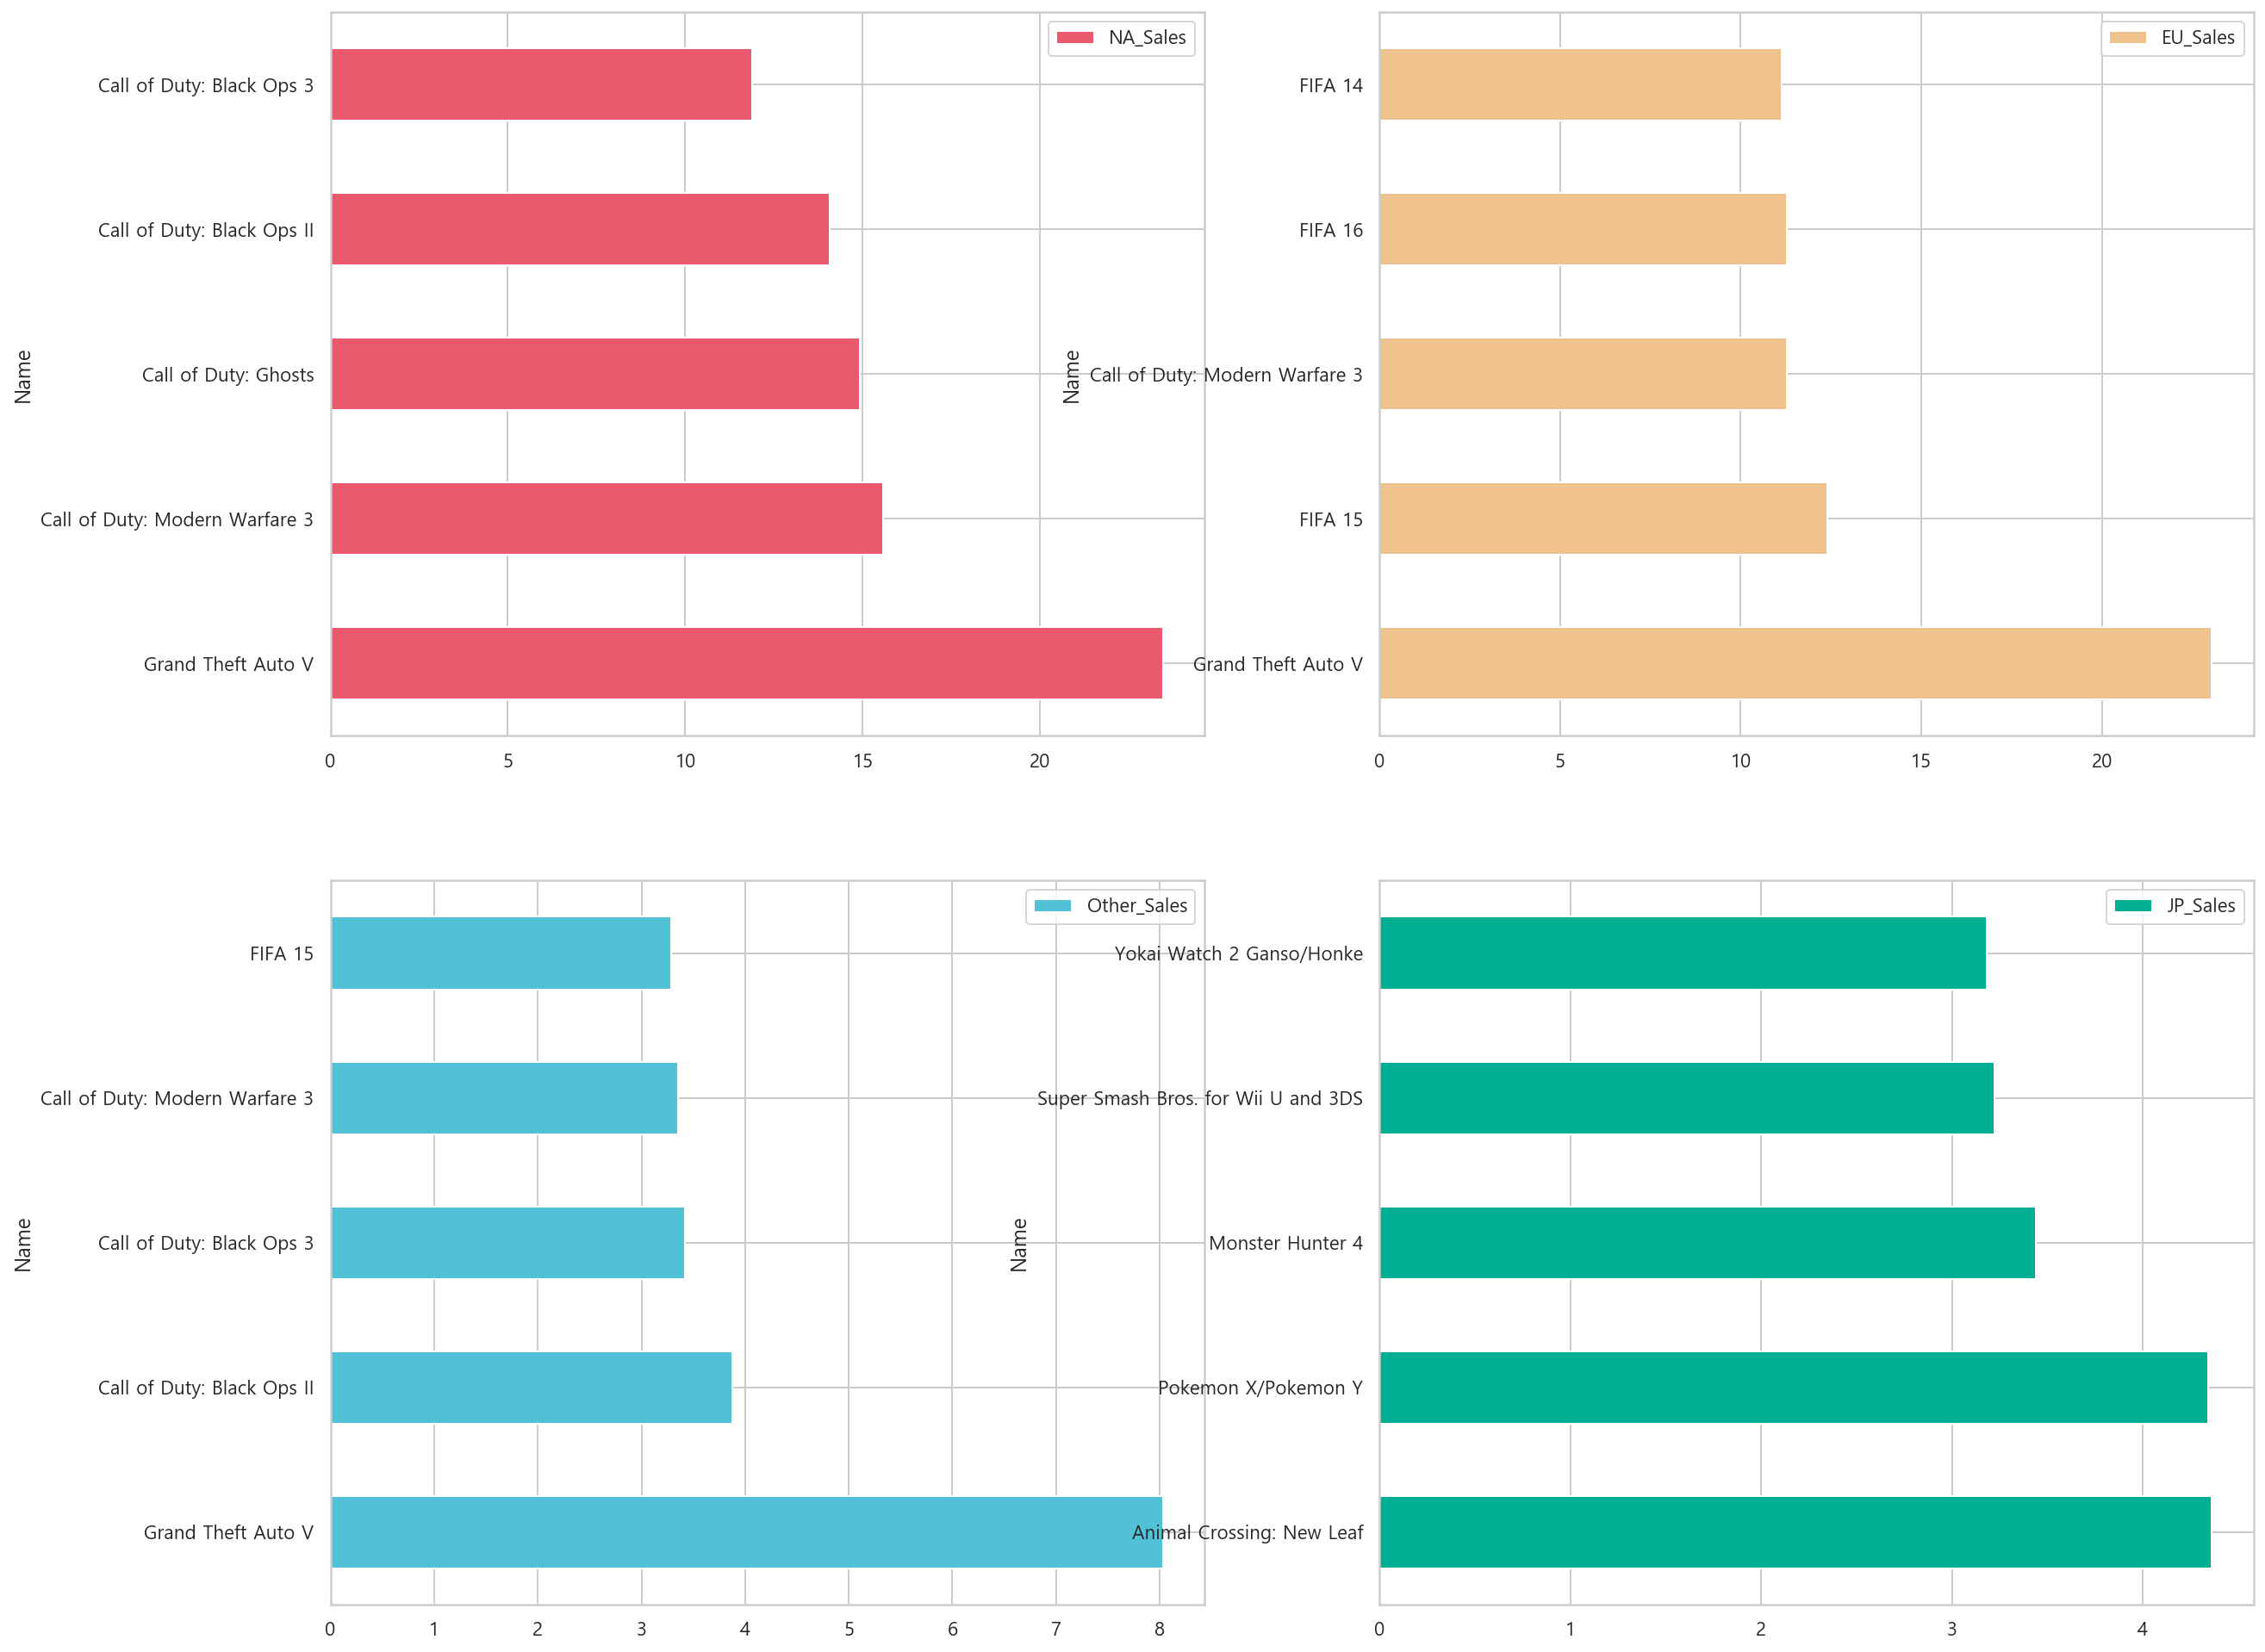

In [115]:
fig, ax = plt.subplots(2,2, figsize= [20,17])
temp_df = df.loc[df['Year']> 2010]
temp_df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'NA_Sales', ascending =False)[['NA_Sales']].head(5).plot(kind = 'barh', ax = ax[0][0], color = '#eb596e');
temp_df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'EU_Sales', ascending =False)[['EU_Sales']].head(5).plot(kind = 'barh', ax = ax[0][1], color = '#f0c38e');
temp_df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'Other_Sales', ascending =False)[['Other_Sales']].head(5).plot(kind = 'barh', ax = ax[1][0], color = '#51c2d5');
temp_df.pivot_table(index = 'Name', values = Sales, aggfunc='sum').sort_values(by= 'JP_Sales', ascending =False)[['JP_Sales']].head(5).plot(kind = 'barh', ax = ax[1][1], color = '#00af91');

NA_Sales의 매출이 높은 게임 : <br>['**Grand Theft Auto V**', '**Call of Duty: Modern Warfare 3**', 'Call of Duty: Ghosts', '**Call of Duty: Black Ops II**', '**Call of Duty: Black Ops 3**']

EU_Sales의 매출이 높은 게임 : <br>['**Grand Theft Auto V**', '**FIFA 15**', '**Call of Duty: Modern Warfare 3**', 'FIFA 16', 'FIFA 14']

Other_Sales의 매출이 높은 게임 : <br>['**Grand Theft Auto V**', **'Call of Duty: Black Ops II**', '**Call of Duty: Black Ops 3**', '**Call of Duty: Modern Warfare 3**', '**FIFA 15**']

JP_Sales의 매출이 높은 게임 : <br>['Animal Crossing: New Leaf', 'Pokemon X/Pokemon Y', 'Monster Hunter 4', 'Super Smash Bros. for Wii U and 3DS', 'Yokai Watch 2 Ganso/Honke']

해석 : 
- 단연 최근에는 **Shooter** 장르의 게임이 압도적인 것을 확인 할 수 있다.
- 일본은 개별로 진행해보자

**2-2) JP지역의 다른 접근**

In [147]:
df.loc[df['Name'].isin(temp_df.pivot_table(index= 'Name', values = 'JP_Sales', aggfunc='sum').sort_values(by='JP_Sales',ascending=False)[:20].index.tolist())].drop(columns=['NA_Sales','EU_Sales','Other_Sales']).sort_values(by = 'Year',ascending=False)[:20]

,Name,Platform,Year,Genre,Publisher,JP_Sales
16576,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.00
5693,Splatoon,WiiU,2015,Shooter,Nintendo,1.44
10893,Monster Hunter X,3DS,2015,Action,Capcom,2.78
6085,Yokai Watch Busters,3DS,2015,Action,Level 5,2.28
12967,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,3.18
12851,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,2.42
10945,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,Nintendo,0.80
538,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,2.62
10835,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,0.00
4252,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,3.08


해석 :
- 발견한 사실  : 최근 Action장르의 매출 상승은 Yokai Watch Busters, 몬스터헌터X의 출시로 인해 높아졌다. 두 게임의 장르를 인터넷 검색을 해보아 다시 확인해 보자면 장르는 Action-RolePlaying 장르라는 것을 확인할 수 있다.
- 결론 : 기존의 RolePlaying은 이미 steady한 상품이 될 수 있는 장르이고 최근에 흥행하는 **Action-Roleplaying**을 결합해 보면 Action-RolePlaying 장르는 일본 게임 시장에서 유리한 입지를 차지할 수 있을 것으로 기대된다.



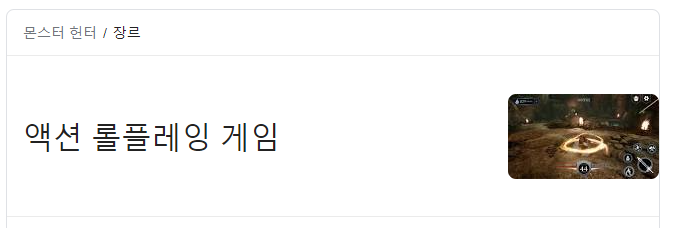

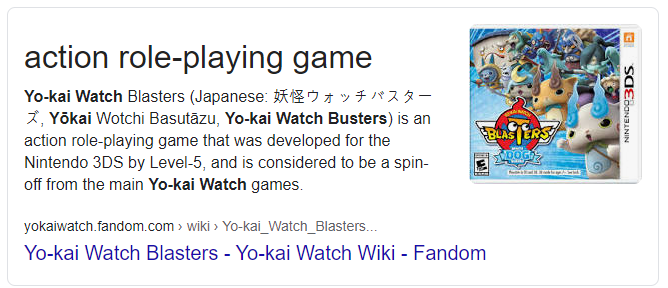

## 군집분석

In [175]:
df_cluster_lab = df.drop(['Name','Year'], axis = 1)
df_cluster_one = df.drop(['Name','Year'], axis = 1)
df_cluster_lab.head(5)

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,DS,Action,Destineer,0.04,0.00,0.00,0.00
2,Wii,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,PSP,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,DS,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,PS3,Platform,D3Publisher,0.12,0.09,0.00,0.04


**1) 범주형 변수 Encoding (수치형 변환)**

In [176]:
from sklearn.preprocessing import LabelEncoder

for i in ['Platform','Genre','Publisher']:
    y1=df_cluster_lab[[i]].values.tolist()

    encoder=LabelEncoder()
    encoder.fit(y1)
    label1=encoder.transform(y1)
    df_cluster_lab[i]=label1
df_cluster_lab.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,4,0,122,0.04,0.00,0.00,0.00
2,26,0,347,0.17,0.00,0.00,0.01
3,19,1,30,0.00,0.00,0.02,0.00
4,4,3,565,0.04,0.00,0.00,0.00
5,17,4,109,0.12,0.09,0.00,0.04


**2) 차원축소 진행**

In [194]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [195]:
col_list= df_cluster_lab.columns.tolist()
scaler = MinMaxScaler()
scaler.fit(df_cluster_lab)
data1_scale = scaler.transform(df_cluster_lab)
data= pd.DataFrame(data1_scale, columns=col_list)
data.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.133333,0.000000,0.212174,0.000964,0.000000,0.000000,0.000000
1,0.866667,0.000000,0.603478,0.004097,0.000000,0.000000,0.000946
2,0.633333,0.083333,0.052174,0.000000,0.000000,0.001957,0.000000
3,0.133333,0.250000,0.982609,0.000964,0.000000,0.000000,0.000000
4,0.566667,0.333333,0.189565,0.002892,0.003101,0.000000,0.003784


<BarContainer object of 9 artists>

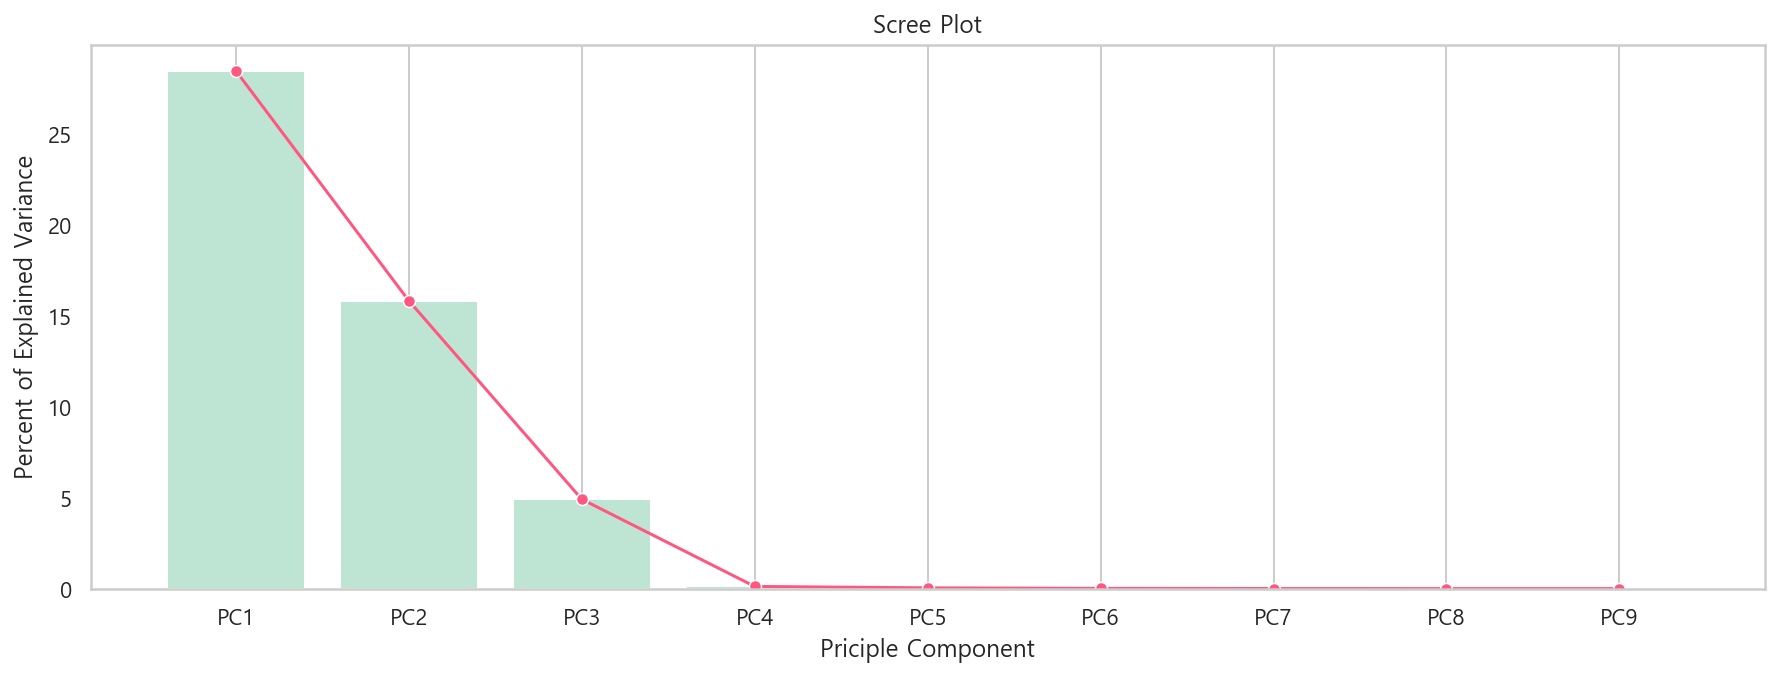

In [203]:
pca = PCA(n_components= len(data.columns)-1, random_state=0)
pca_fit = pca.fit(data)

per_var = pca_fit.explained_variance_ratio_* 100
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize= [15,5])
plt.grid(axis = 'y')
plt.title('Scree Plot')
plt.xlabel('Priciple Component')
plt.ylabel('Percent of Explained Variance')
sns.lineplot(x = range(1, len(per_var)+1), y = 100-per_var.cumsum(), color = '#ff577f', marker= 'o')
plt.bar(x = range(1, len(per_var)+1), height = 100-per_var.cumsum(), tick_label = labels, color = '#bee5d3')

In [207]:
pca_dim = PCA(n_components=3, random_state=0)
pca_transformed = pca_dim.fit_transform(data)
data['PCA_x'] = pca_transformed[:,0]
data['PCA_y'] = pca_transformed[:,1]
data['PCA_z'] = pca_transformed[:,2]
data.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,PCA_x,PCA_y,PCA_z
0,0.133333,0.000000,0.212174,0.000964,0.000000,0.000000,0.000000,-0.404190,-0.467665,-0.822275
1,0.866667,0.000000,0.603478,0.004097,0.000000,0.000000,0.000946,-1.452865,-0.587487,-0.352323
2,0.633333,0.083333,0.052174,0.000000,0.000000,0.001957,0.000000,1.624838,-0.177988,-0.788257
3,0.133333,0.250000,0.982609,0.000964,0.000000,0.000000,0.000000,0.426473,-0.715848,0.666038
4,0.566667,0.333333,0.189565,0.002892,0.003101,0.000000,0.003784,-0.400372,0.150412,-0.604672


**3) 군집분석 진행**

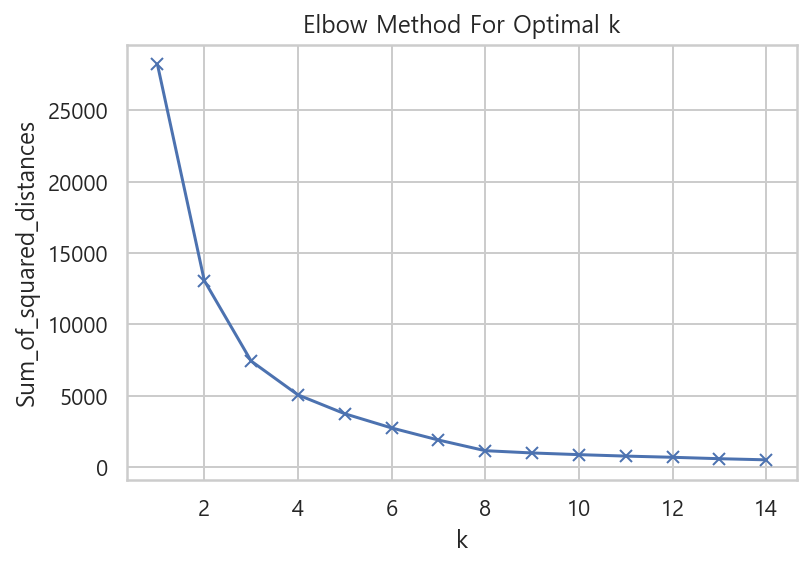

In [208]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data[['PCA_x','PCA_y','PCA_z']])
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [213]:
model=KMeans(n_clusters=4,max_iter=100,init='k-means++')
model.fit(data[['PCA_x','PCA_y','PCA_z']])
x=model.predict(data[['PCA_x','PCA_y','PCA_z']])

In [277]:
df[sales].T.sum()

1        0.04
2        0.18
3        0.02
4        0.04
5        0.25
         ... 
16594    0.20
16595    0.01
16596    0.79
16597    0.38
16598    0.17
Length: 16327, dtype: float64

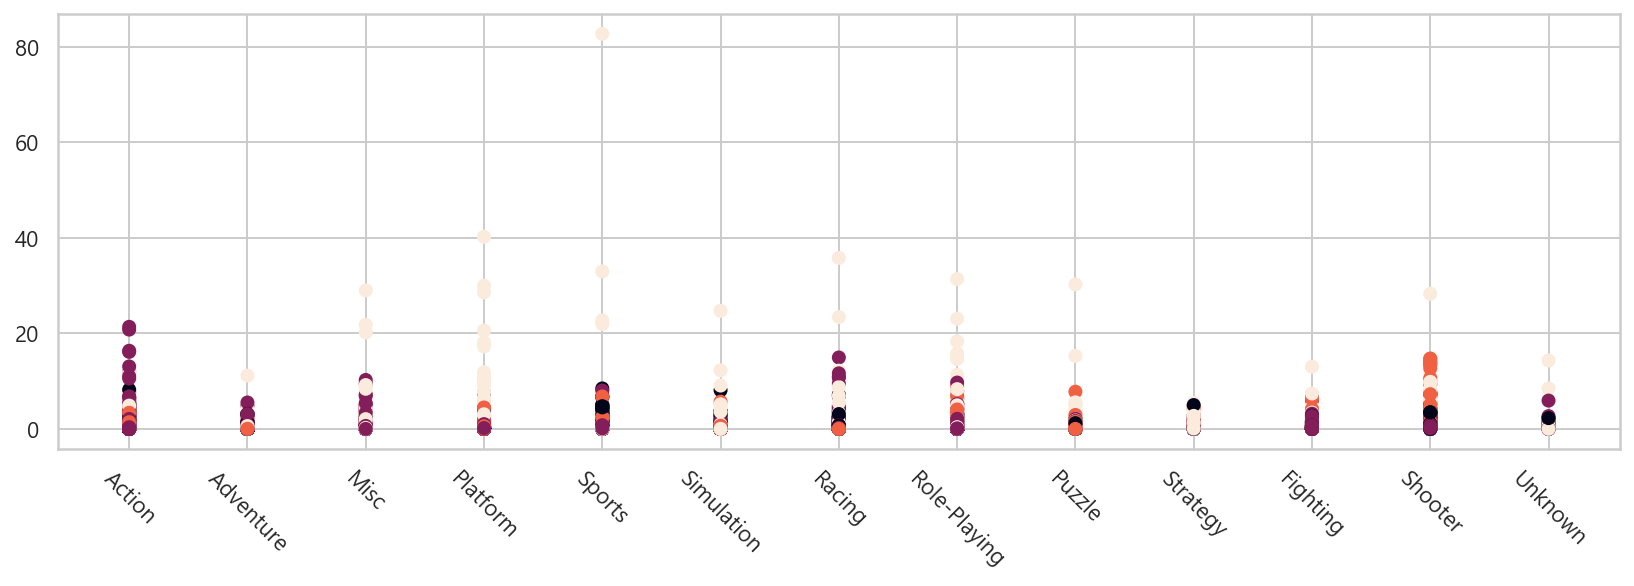

In [288]:
fig=plt.gcf()  
fig.set_size_inches(14,4)
plt.xticks(rotation = - 45 )
plt.scatter(x=df['Genre'], y=df[sales].T.sum() , c=df['cluster']);

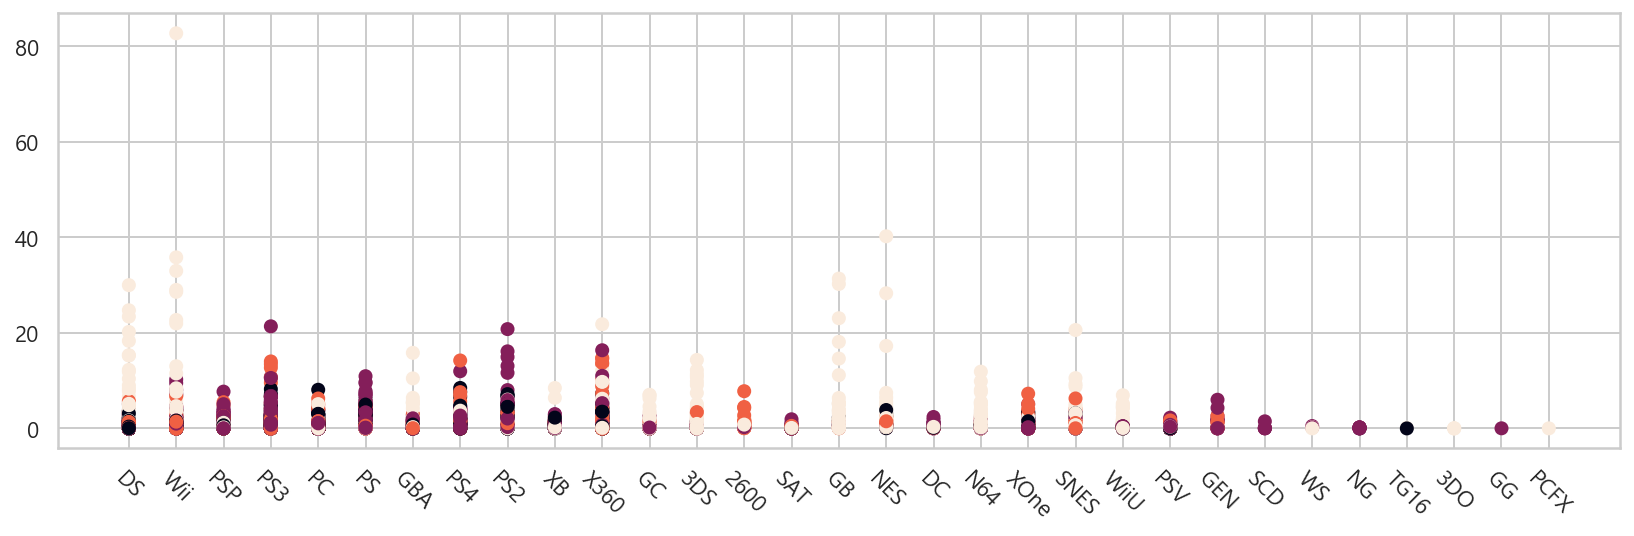

In [283]:
fig=plt.gcf()  
fig.set_size_inches(14,4)
plt.xticks(rotation = - 45 )
plt.scatter(x=df['Platform'], y=df[sales].T.sum() , c=df['cluster']);

In [214]:
df['cluster'] = x
data['cluster'] = x
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,3
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,2
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,1
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0


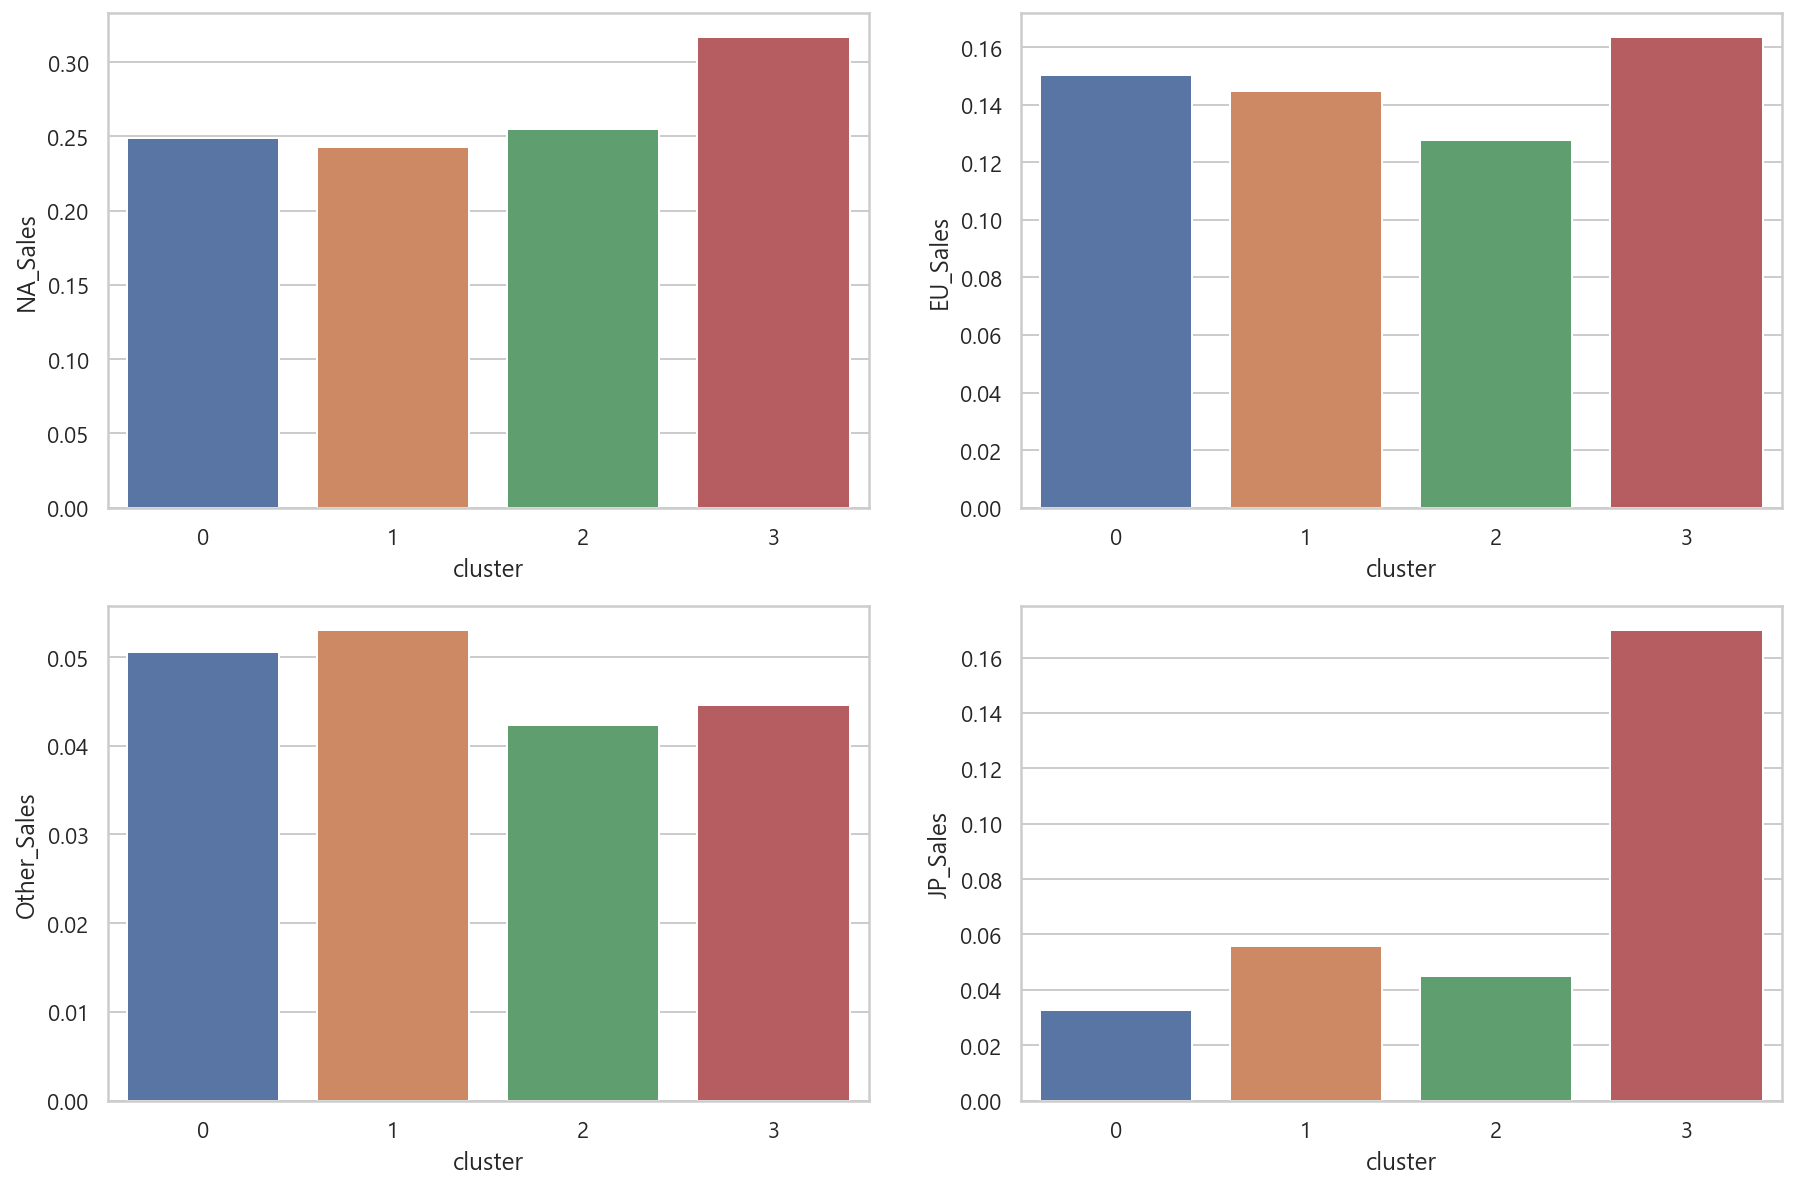

In [268]:
fig, ax = plt.subplots(figsize =(15,10), ncols = 2, nrows = 2)

for y,x in enumerate(sales):
    row = int(y/2)
    col = y%2
    sns.barplot(data = df, y=x, x = 'cluster', ax = ax[row][col], ci = False)


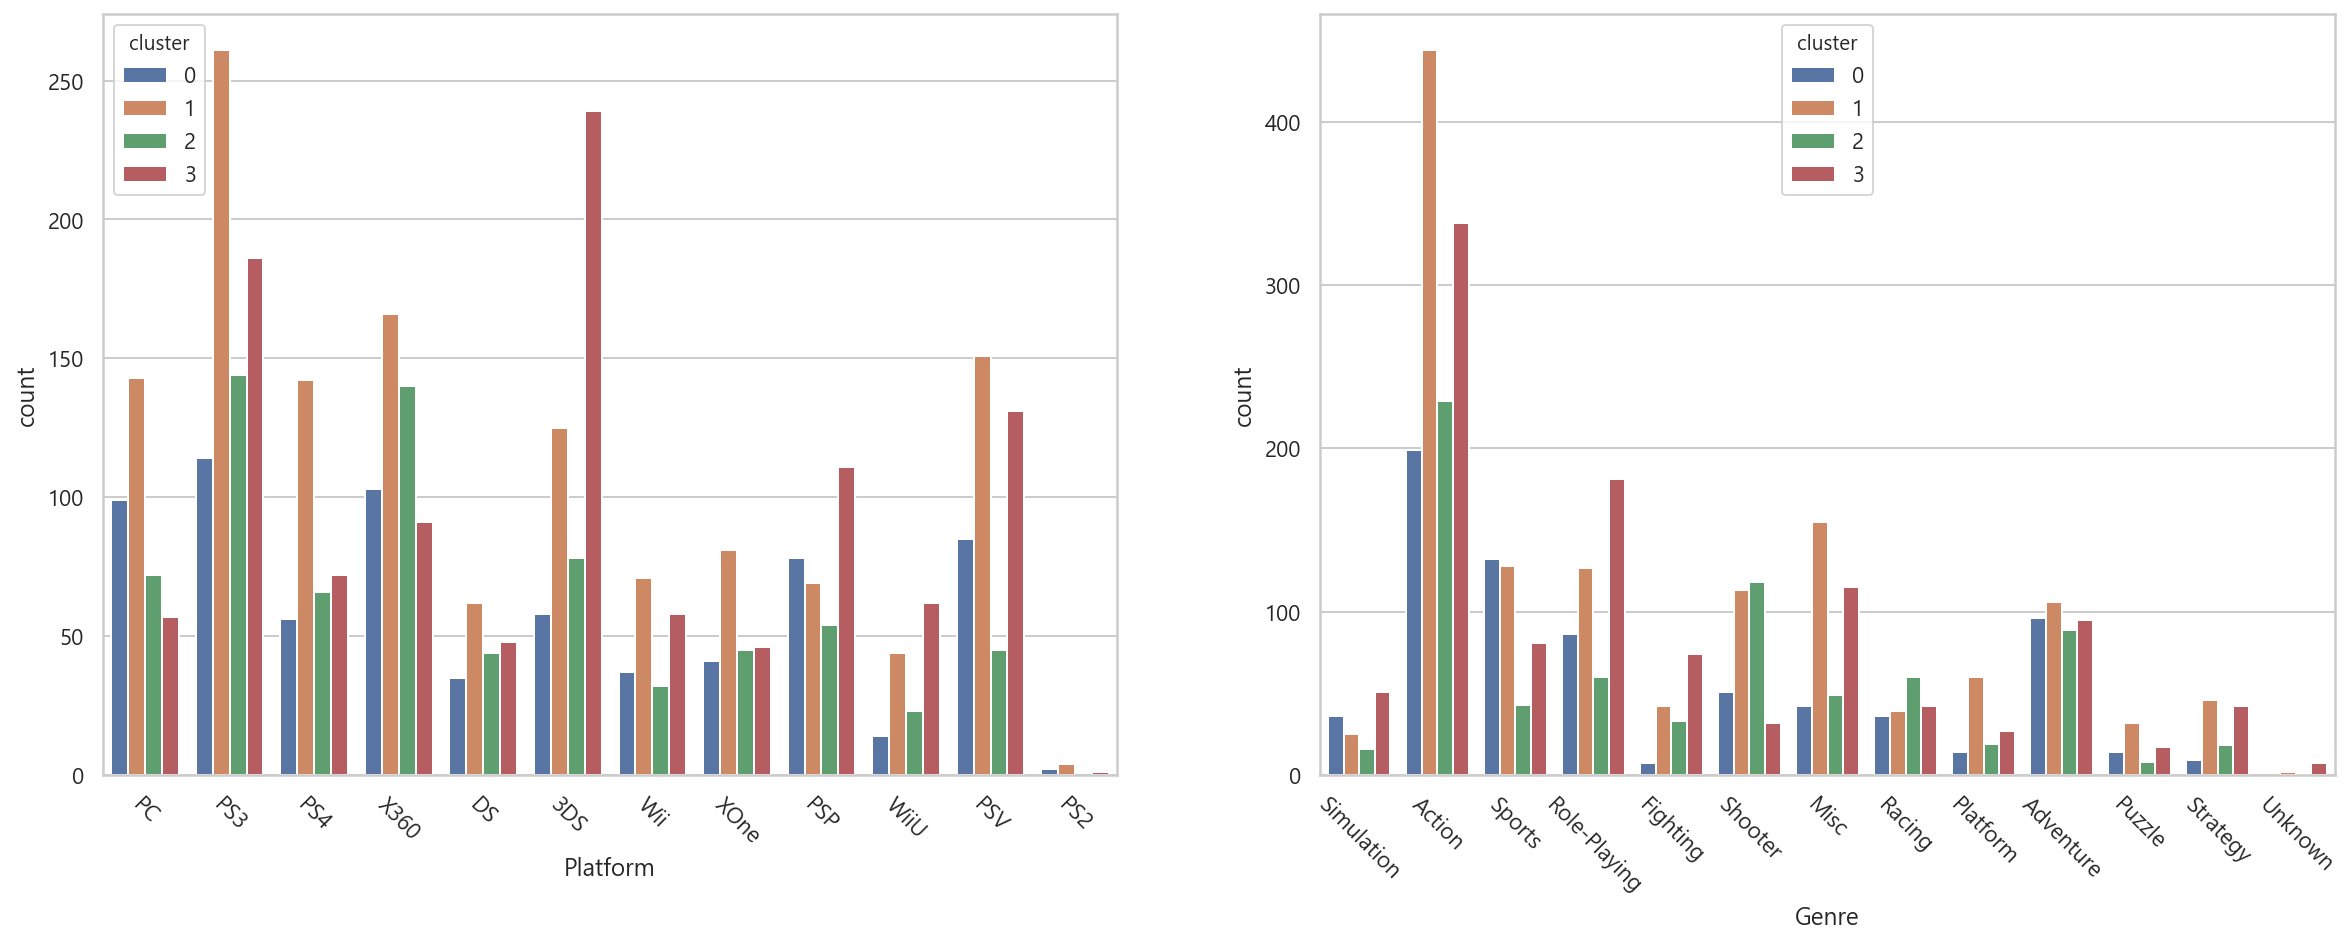

In [261]:
temp1_df = df.loc[df['Year']>2010]
fig, ax = plt.subplots(figsize =(20,7), ncols = 2, nrows = 1)
ax[0].tick_params(axis='x', rotation=-45)
sns.countplot(data = temp1_df, x='Platform', hue = 'cluster', ax = ax[0])
ax[1].tick_params(axis='x', rotation=-45)
sns.countplot(data = temp1_df, x='Genre', hue = 'cluster', ax = ax[1])

---
해석 : 
- 3번 군집이 유독 튀는 값을 갖고 있는 것을 보면 일반적인 지역과 달랐던 일본으로 보인다.
    - 일본은 **3DS, PS3**와 같이 콘솔 게임류(특히, handheld game console)에 더 큰 값을 갖으며 앞서 분석했던 것과 같이 **Action-Roleplaying**에 유독 높은 값을 갖는 것을 군집분석을 통해 확인할 수 있었다.
- 나머지 0,1,2번 군집은 대체로 유사한 분포를 보이며 유사한 장르를 선호하는것으로 확인되므로 같은 시장을 공략하면 좋을 것이라는 것을 확인할 수 있다.
---

# 제안

> ANOVA검정으로 네지역간의 매출액간 차이가 있다는 것을 확인할 수 있었다. 그러므로 지역별로 개별적인 제안을 하고자 하는데 북미와 유럽, 기타 국가는 게임산업이 같은 흐름을 따르는 한편 일본은 유독 다른 흐름을 갖으므로 북미와 유럽, 기타국가는 같은 방향의 제안을 할 것이고 일본만 다른 제안을 하고자 한다.

- **NA, EU, Other**
    - 2010년 이후 Shooter게임 인기의 상승과 Call of Duty Series와 GTA Series 같은 Series물과 PC와 Console로 다양하게 즐길 수 있는 Platform을  선호하는 것을 확인했다. 
    - 그러므로, Shooter장르의 Series물과 PC와 Console 두 Platform 모두에서 플레이할 수 있는 게임을 제안하고자 한다.
<br><br>

- **JP**
    - RolePlaying 게임이 전반적인 인기를 끌어왔고 2010년 이후로는 Yokai Watch와 Monster Hunter 게임의 등장으로 Action을 동반한 Action-RolePlaying이 일본 내에서 입지를 다지고 있다. 또한 콘솔 게임류 그 중에서도 들고다닐 수 있는 휴대용 콘솔 게임기를 선호하는 것을 확인 했다.
    - 그러므로, Action-RolePlaying 장르의 휴대용 콘솔 게임기로 즐길 수 있는 게임을 제안한다.